Data Project: Stock Market Analysis

Alumno: Alejandro Ayos

# **Curso Introducción a Python para el Análisis y la Visualización de Datos Financieros 3ra cohorte**
El objetivo principal del curso es introducir a los estudiantes en el mundo de Data Analytics trabajando con Python, que es un lenguaje muy popular y altamente demandado en el mercado laboral. Por otra parte, busca colaborar con aquellas personas que buscan incorporar el uso de Python para el ordenar, modelar y analizar base de datos de una manera lógica y eficiente.

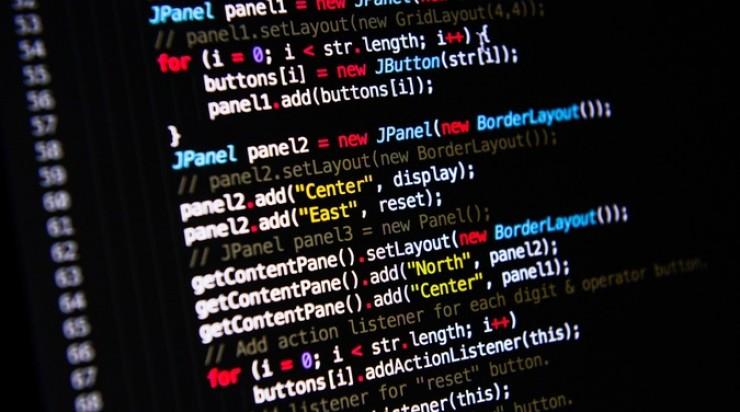

Módulos:


1. Overview del Curso y configuración de Ambientes
2. Funciones básicas para la preparación de datos en Python
3. Tablas Pivot y Joins en Python
4. Agrupación y agregación de datos en Python
5. Manipulación de datos en Python
6. Visualización de datos en Python
7. Ejercicio Integrador
8. Introducción a modelos de Clasificación en Python
9. Introducción a técnicas de Forecasting en Python
10. Introducción a técnicas de NLP en Python

Equipo Docente:

Lic. Pablo Garriga Suárez 

Mfin. Adrian Acevedo

https://fce.uncuyo.edu.ar/cursos/curso/curso-introduccion-a-python-para-el-analisis-y-la-visualizacion-de-datos-financieros

**Glosario**:

Open/Close - Captura el precio de apertura/cierre de la acción

Adj_Open/Adj_Close - Es el precio de apertura/cierre ajustado es el precio de una acción en un día determinado de negociación que ha sido revisado para incluir cualquier distribución de dividendos, divisiones de acciones y otras acciones corporativas que se produjeron en cualquier momento antes de la apertura del día siguiente.

Volume - registra el número de acciones que se negocian en un día determinado de negociación.

High/Low -  registra el precio más alto y el más bajo de las acciones durante un día de negociación determinado.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.graph_objs as go
import seaborn as sns
##sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import yfinance as yf

In [4]:
!pip install yahoofinancials
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15191 sha256=28013c428c12c90d68d17f5146644839fd3a8bd209e5f551a290e556da34a2f6
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [5]:
from datetime import datetime
import datetime as dt

In [7]:
YPF = yf.download(tickers='YPF',period='4y', interval='1d') 
YPF

[*********************100%***********************]  1 of 1 completed


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2018-11-12  15.69  16.01  15.44  15.54  15.324031   743000
2018-11-13  15.50  15.50  14.74  14.96  14.752092  1180600
2018-11-14  15.10  15.66  14.84  15.52  15.304310   728400
2018-11-15  15.53  16.09  15.32  15.91  15.688889   871600
2018-11-16  15.86  16.26  15.49  15.92  15.698750   945700
...           ...    ...    ...    ...        ...      ...
2022-11-07   8.05   8.27   7.92   7.93   7.930000  1627800
2022-11-08   7.90   7.90   7.61   7.75   7.750000  1936900
2022-11-09   7.73   7.75   7.04   7.12   7.120000  2799700
2022-11-10   7.50   7.61   7.11   7.19   7.190000  1800000
2022-11-11   7.36   7.71   7.31   7.66   7.660000  1491872

[1008 rows x 6 columns]

In [9]:
# para ver el tamaño de la muestra
YPF.shape

(1008, 6)

In [10]:
 # Summary Stats 
 # para ver info estadística del objeto (count/mean/std/min/max)
YPF.describe()

Open         High          Low        Close    Adj Close  \
count  1008.000000  1008.000000  1008.000000  1008.000000  1008.000000   
mean      7.348879     7.513532     7.174385     7.336736     7.315803   
std       4.271631     4.324459     4.216714     4.273862     4.235986   
min       2.780000     2.940000     2.250000     2.570000     2.570000   
25%       4.250000     4.370000     4.120000     4.217500     4.217500   
50%       5.170000     5.295000     5.050000     5.160000     5.160000   
75%       9.482500     9.680000     9.315000     9.480000     9.480000   
max      18.530001    18.730000    18.350000    18.500000    18.450001   

             Volume  
count  1.008000e+03  
mean   2.028052e+06  
std    1.861905e+06  
min    3.254000e+05  
25%    1.151200e+06  
50%    1.622750e+06  
75%    2.362800e+06  
max    2.681430e+07

In [11]:
# General Info
YPF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2018-11-12 to 2022-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


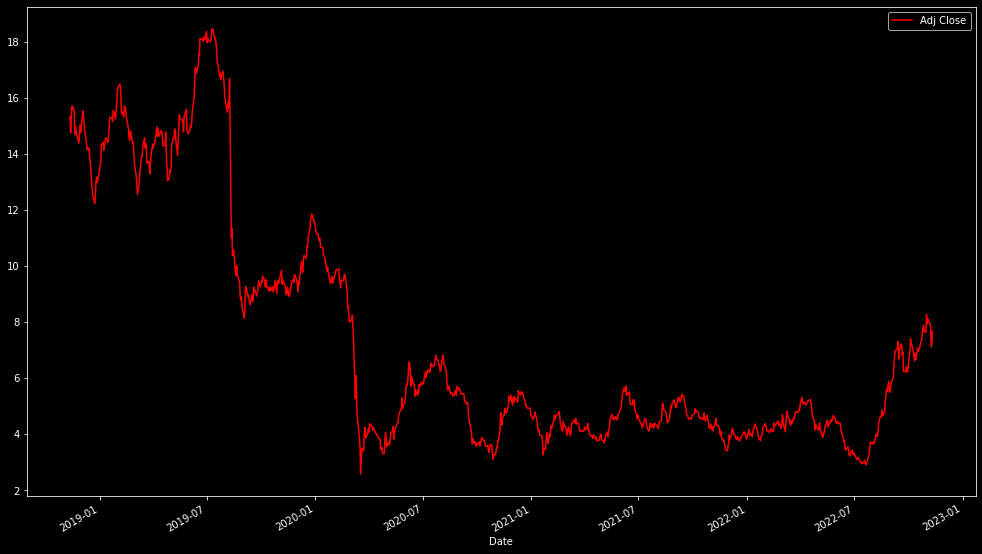

In [12]:
plt.style.use('dark_background')
YPF['Adj Close'].plot(legend=True,figsize=(17,10),color='r')

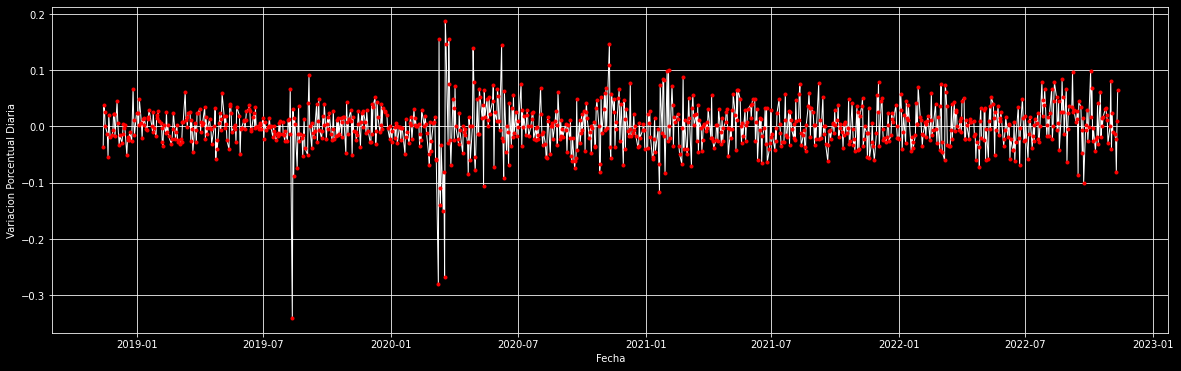

In [16]:
# Gráfico de los retornos diarios de YPF
YPF['Return'] = YPF['Close']/YPF['Close'].shift(1) -1 #Acá creo la "formula" de Return dividiendo el precio actual sobre el precio anterior
plt.plot(YPF['Return'],'w', lw=1) # Acá graficamos (ploteamos) la línea de la fórmula
plt.plot(YPF['Return'], 'r.') # Acá graficamos los puntos rojos. Mirar que luego de la r viene un puntito
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [18, 6]
plt.grid(True)
plt.xlabel('Fecha')
plt.ylabel('Variacion Porcentual Diaria')
plt.show()

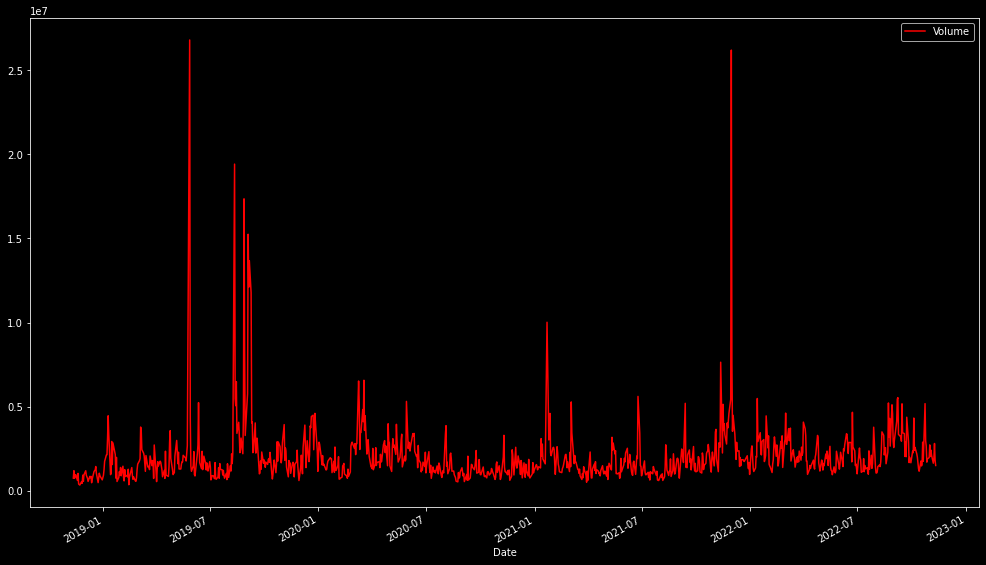

In [20]:
# Gráfica de Volumen Operado
# Mientras mayor es el volúmen operado la información es más eficiente (mercados mas chicos son más volatiles)
plt.style.use('dark_background')
YPF['Volume'].plot(legend=True,figsize=(17,10),color='r')

In [22]:
# Para tener un comportamiento más tendencial, usamos Medias Móviles, sacando el promedio de la acción en distintas ventanas de tiempo
# El operador "rolling" preseleccionando las n observaciones en el intervalo (días), y le calcula la media

YPF['MA_10'] =  YPF['Adj Close'].rolling(10).mean()
YPF['MA_20'] =  YPF['Adj Close'].rolling(20).mean()
YPF['MA_50'] =  YPF['Adj Close'].rolling(50).mean()

YPF

Open   High    Low  Close  Adj Close   Volume    Return  MA_10  \
Date                                                                          
2018-11-12  15.69  16.01  15.44  15.54  15.324031   743000       NaN    NaN   
2018-11-13  15.50  15.50  14.74  14.96  14.752092  1180600 -0.037323    NaN   
2018-11-14  15.10  15.66  14.84  15.52  15.304310   728400  0.037433    NaN   
2018-11-15  15.53  16.09  15.32  15.91  15.688889   871600  0.025129    NaN   
2018-11-16  15.86  16.26  15.49  15.92  15.698750   945700  0.000629    NaN   
...           ...    ...    ...    ...        ...      ...       ...    ...   
2022-11-07   8.05   8.27   7.92   7.93   7.930000  1627800 -0.013682  7.884   
2022-11-08   7.90   7.90   7.61   7.75   7.750000  1936900 -0.022699  7.896   
2022-11-09   7.73   7.75   7.04   7.12   7.120000  2799700 -0.081290  7.830   
2022-11-10   7.50   7.61   7.11   7.19   7.190000  1800000  0.009831  7.762   
2022-11-11   7.36   7.71   7.31   7.66   7.660000  1491872  0.065369  7.764   

            MA_20   MA_50  
Date                       
2018-11-12    NaN     NaN  
2018-11-13    NaN     NaN  
2018-11-14    NaN     NaN  
2018-11-15    NaN     NaN  
2018-11-16    NaN     NaN  
...           ...     ...  
2022-11-07  7.418  6.9232  
2022-11-08  7.469  6.9606  
2022-11-09  7.495  6.9928  
2022-11-10  7.511  7.0268  
2022-11-11  7.561  7.0676  

[1008 rows x 10 columns]

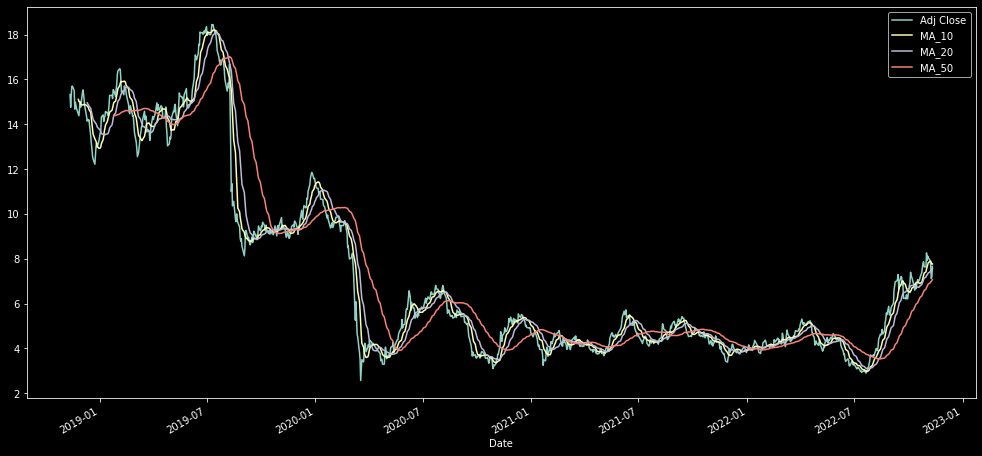

In [23]:
# Gráficamos en un mismo plot el precio de cierre, y los promedios para 10, 20 y 50 días

YPF[['Adj Close','MA_10','MA_20','MA_50']].plot(subplots=False,figsize=(17,8))

Análisis del riesgo de la acción: evaluación de cambios intradiarios


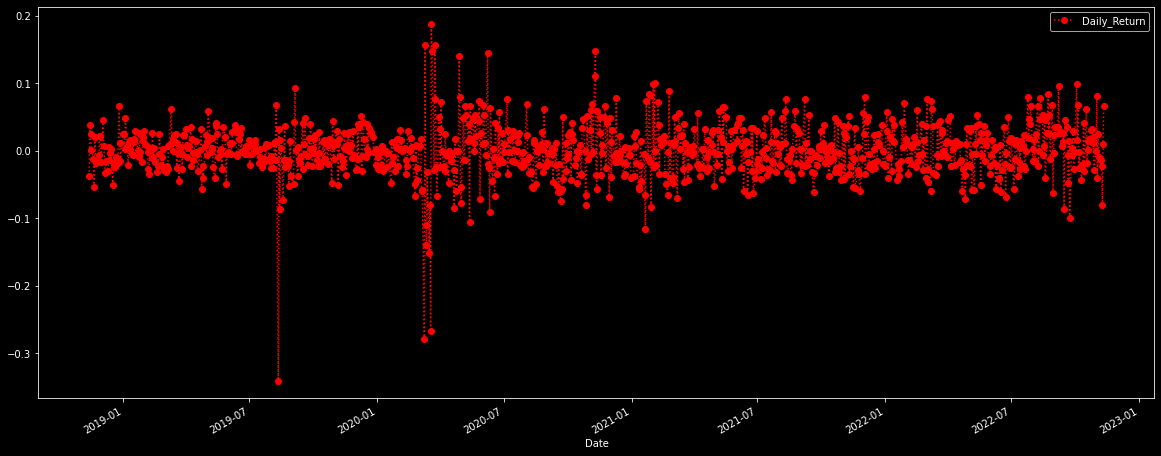

In [24]:
# Retornos de una Acción = variación del precio de una acción a lo largo del tiempo
# Rendimiento de una Acción = como se capitaliza o rentabiliza una acción
# pct_change = sobre una variable calcularle la variación entre períodos / variación de precio intradiario

# Creación de la variable "pct_change" para reflejar retornos en intradiario
YPF['Daily_Return'] = YPF['Adj Close'].pct_change()
# Gráfico de evolución diaria de la nueva variable
YPF['Daily_Return'].plot(figsize=(20,8),legend=True,linestyle=':',marker='o',color='r')

Es una acción que no tiene una tendencia al alza, y tiene alto nivel de volatilidad. 

**Gráfico a través de Seaborn para crear histograma y un gráfico en misma figura:**

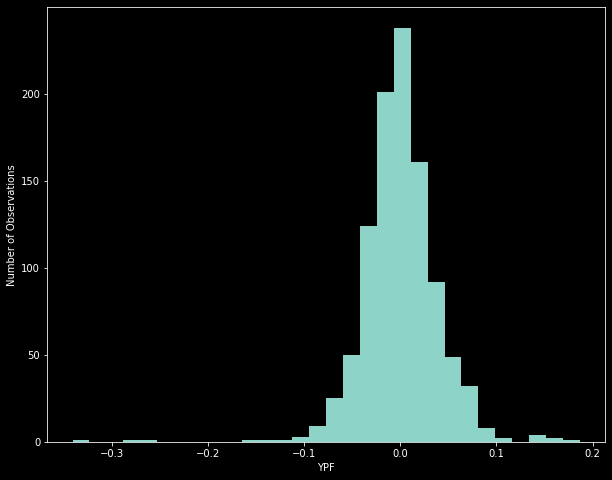

In [25]:
# Un buen punto de partida es mirar un histograma, usando los subplots (en este caso uno solo).
# En este histograma vemos el comportamiento de la serie en función de la variable de "retorno"

fig,ax = plt.subplots(figsize=(10,8))
ax.hist(YPF['Daily_Return'], label ='Daily Return YPF', bins=30)
ax.set_xlabel('YPF')
ax.set_ylabel('Number of Observations')
plt.show()

En este gráfico vemos la cantidad de observaciones dentro del rango. 
Esta acción va tomando distintos valores a lo largo del tiempo, está acción tiene distintos momentos donde ha tenido variabilidad e influenciada por los eventos. 
En un mercado eficiente (precio hacia el alza) donde las señales del mercado son tan claras, no es esperable conseguir situaciones donde el retorno se aleje de la media. Si la información es eficiente y fluye.
Este gráfico nos muestra que ha habido momentos de valores atípicos, para arriba o para abajo (cola de la distribución).
Tiene momentos de picos hacia la derecha (pocas observaciones/outliers).

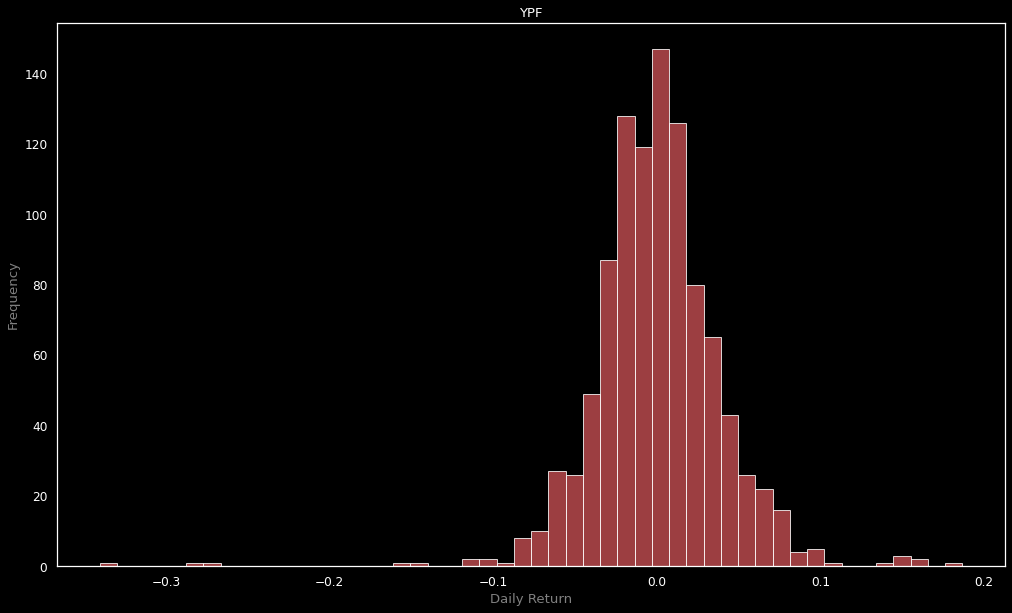

In [ ]:
import matplotlib.pyplot as plt
 
# Seteo de dimensiones para plot
fig, ax = plt.subplots(figsize=(17, 10))
 
# Graficamos contenido de acción

YPF['Daily_Return'].plot.hist(alpha=0.8,  # Con alpha seteamos la transparencia
                     color='r',
                     bins=50,
                     title='YPF')
plt.xlabel('Daily Return', color='grey')
plt.ylabel('Frequency',color='grey')
plt.grid(False)
plt.show()

Tiene mas variabilidad o probabilidades de perder (mayor cantidad de valores a la izquierda, no es totalmente simétrica).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


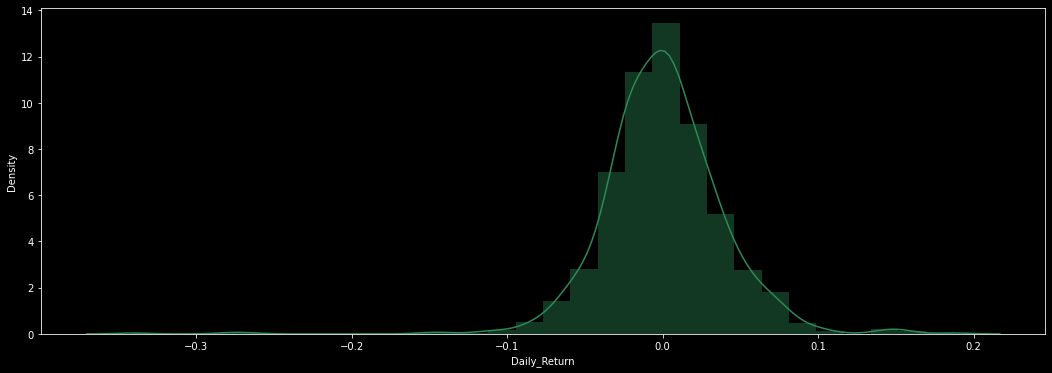

In [26]:
# Utilizamos la librería de Seaborn, pero superponiendo una campana gausseana
# Utilizamos "dropna()" para eliminar "NaN" (valores nulos) que no son leídos por la librería de Seaborn.
# Bins = parametro para el ancho de la barra en el histógrama

import seaborn as sns
sns.distplot(YPF['Daily_Return'].dropna(),bins=30,color='seagreen')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


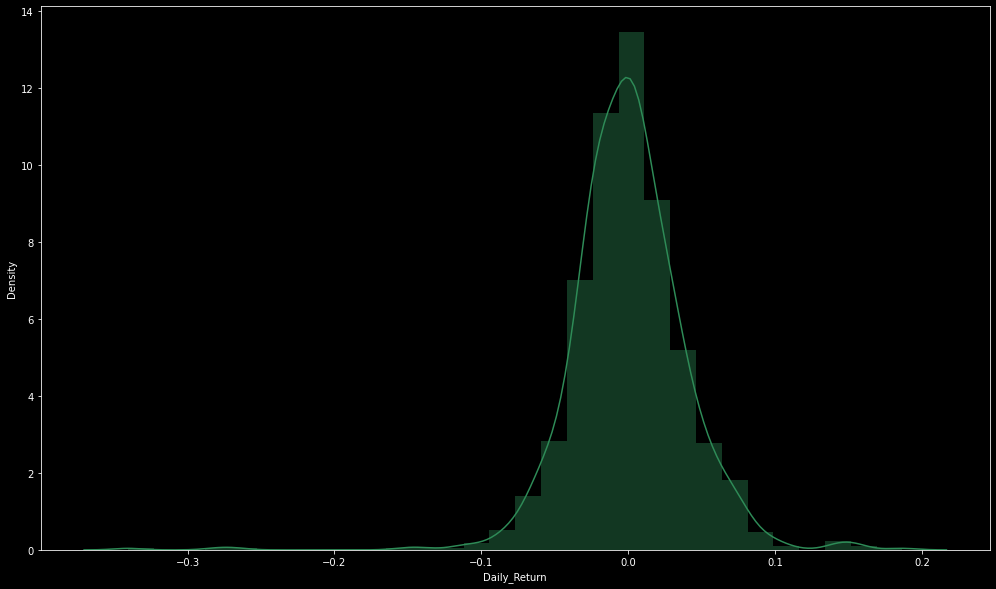

In [27]:
# Combinamos matplolib con seaborn
# Necesito matplotlib para construir la estructura/maqueta y dentro de eso le meto seaborn

import seaborn as sns
import matplotlib.pyplot as plt
 
#Seteamos las dimensiones del plot 
fig, ax = plt.subplots(figsize=(17, 10))
 
#Graficamos el contenido del plot redimensionado
sns.distplot(YPF['Daily_Return'].dropna(),bins=30,color='seagreen')
plt.show()

El comportamiento es bastante cercano a una distribución normal, pero tiene una concentración de valores cercanos a la media (cero) fuerte. 


In [30]:
# Creamos unas metrícas nuevas
# Indice es una variable de fecha
# Necesitamos una variable que combine año con meses para que no se superpongas períodos anteriores

df=YPF
df['Date1']=df.index
df['Year'] = df['Date1'].dt.year
df['Month'] = df['Date1'].dt.month
df['WeekDay'] = df['Date1'].dt.weekday
df['Month_Year'] = df['Date1'].dt.strftime('%Y%m')
df.sample(20) #utilizamos df.sample() en vez de df.head() para que los valores sean aleatorios

Open   High        Low  Close  Adj Close   Volume    Return  \
Date                                                                           
2022-03-25   4.780000   4.87   4.690000   4.79       4.79  2347500  0.000000   
2019-11-27   9.400000   9.78   9.310000   9.68       9.68  1478300  0.028693   
2022-01-27   4.060000   4.06   3.860000   3.97       3.97  2078200  0.005063   
2022-03-18   4.500000   4.53   4.370000   4.38       4.38  1392500 -0.022321   
2022-06-22   3.450000   3.52   3.350000   3.47       3.47  1704700 -0.019774   
2022-08-04   3.730000   3.79   3.620000   3.66       3.66  1096400 -0.016129   
2021-06-16   5.400000   5.51   5.360000   5.50       5.50   903600  0.012891   
2022-02-08   4.100000   4.16   4.000000   4.05       4.05  1564000 -0.019370   
2020-04-13   4.320000   4.32   3.860000   4.00       4.00  1718300 -0.047619   
2020-09-03   5.520000   5.61   5.400000   5.52       5.52  1016600 -0.003610   
2022-09-09   6.900000   7.05   6.770000   6.97       6.97  3343000  0.029542   
2021-07-07   4.350000   4.38   4.230000   4.33       4.33  1085500 -0.002304   
2021-03-18   4.490000   4.59   4.300000   4.35       4.35  1275100 -0.046053   
2021-03-16   4.530000   4.60   4.320000   4.39       4.39  1261400 -0.026608   
2020-07-08   6.000000   6.21   5.900000   6.20       6.20  1070400  0.029900   
2019-10-03   9.550000   9.66   9.330000   9.41       9.41  1383000 -0.004233   
2022-07-27   3.240000   3.35   3.150000   3.35       3.35  1592700  0.046875   
2022-01-06   4.090000   4.09   3.940000   3.95       3.95  1342200 -0.010025   
2020-08-21   5.450000   5.48   5.330000   5.35       5.35   555900 -0.021938   
2019-07-22  17.389999  17.42  16.799999  16.99      16.99  1236700 -0.017351   

             MA_10      MA_20      MA_50  Daily_Return      Date1  Year  \
Date                                                                      
2022-03-25   4.534   4.502500   4.303600      0.000000 2022-03-25  2022   
2019-11-27   9.257   9.332000   9.288600      0.028693 2019-11-27  2019   
2022-01-27   4.025   4.015000   3.929400      0.005063 2022-01-27  2022   
2022-03-18   4.460   4.430000   4.239600     -0.022321 2022-03-18  2022   
2022-06-22   3.788   4.123000   4.334000     -0.019774 2022-06-22  2022   
2022-08-04   3.448   3.228000   3.590800     -0.016129 2022-08-04  2022   
2021-06-16   5.476   5.057000   4.418000      0.012891 2021-06-16  2021   
2022-02-08   4.161   4.109000   3.991600     -0.019370 2022-02-08  2022   
2020-04-13   4.182   3.890500   6.597000     -0.047619 2020-04-13  2020   
2020-09-03   5.523   5.629000   6.040600     -0.003610 2020-09-03  2020   
2022-09-09   6.019   5.440500   4.179000      0.029542 2022-09-09  2022   
2021-07-07   4.687   5.017500   4.665200     -0.002304 2021-07-07  2021   
2021-03-18   4.321   4.259500   4.223800     -0.046053 2021-03-18  2021   
2021-03-16   4.248   4.285500   4.228400     -0.026608 2021-03-16  2021   
2020-07-08   5.860   5.791000   5.074200      0.029900 2020-07-08  2020   
2019-10-03   9.213   9.057000  10.977800     -0.004233 2019-10-03  2019   
2022-07-27   3.045   3.097000   3.680800      0.046875 2022-07-27  2022   
2022-01-06   3.992   3.934500   4.007400     -0.010025 2022-01-06  2022   
2020-08-21   5.626   6.077000   6.057200     -0.021938 2020-08-21  2020   
2019-07-22  17.966  18.024154  16.641121     -0.017351 2019-07-22  2019   

            Month  WeekDay Month_Year  
Date                                   
2022-03-25      3        4     202203  
2019-11-27     11        2     201911  
2022-01-27      1        3     202201  
2022-03-18      3        4     202203  
2022-06-22      6        2     202206  
2022-08-04      8        3     202208  
2021-06-16      6        2     202106  
2022-02-08      2        1     202202  
2020-04-13      4        0     202004  
2020-09-03      9        3     202009  
2022-09-09      9        4     202209  
2021-07-07      7        2     202107  
2021-03-18      3        3     202103  
2021-

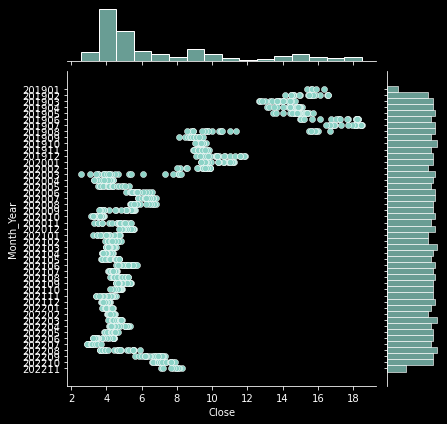

In [32]:
# Dentro de seaborn, tenemos el gráfico de jointplot
# Me gráfica una distribución bivariada (dos variables al mismo tiempo)
# Corta cada uno de los buckets por la variable "Month_Year"

df.dropna(inplace=True)

sns.jointplot(x = "Close", y = "Month_Year", data = df)

plt.show()

En la linea horizontal esta el precio de la acción. Podemos observar como el comportamiento de la acción desde 2019 es a la baja, retomando una racha alcista en los últimos meses.

**Análisis comparativo versus otras acciones**

In [34]:
# Comparativa de cotizaciones de acciones en un mismo DataFrame llamaado "stock" (Mercado Libre, Mirgor, Banco Macro, YPF)
stock =  ['MELI','MIRG.BA','BMA', 'YPF']
stock

['MELI', 'MIRG.BA', 'BMA', 'YPF']

In [35]:
stock_prices = yf.download(tickers=stock,period='5y', interval='1d')


[*********************100%***********************]  4 of 4 completed


In [36]:
stock_prices.head()

Adj Close                                          Close  \
                  BMA        MELI     MIRG.BA        YPF         BMA   
Date                                                                   
2017-11-13  99.158638  266.954407  492.724335  22.838131  113.970001   
2017-11-14  84.924759  262.366577  475.614105  22.059113   97.610001   
2017-11-15  88.065605  263.416077  485.000244  21.950640  101.220001   
2017-11-16  93.425064  262.356598  495.461884  22.680355  107.379997   
2017-11-17  89.927490  269.603180  488.128967  22.660631  103.360001   

                                                     High              ...  \
                  MELI     MIRG.BA        YPF         BMA        MELI  ...   
Date                                                                   ...   
2017-11-13  267.079987  503.950012  23.160000  117.589996  273.679993  ...   
2017-11-14  262.489990  486.450012  22.370001  112.980003  267.070007  ...   
2017-11-15  263.540009  496.049988  22.260000  102.500000  266.959991  ...   
2017-11-16  262.480011  506.750000  23.000000  109.730003  267.880005  ...   
2017-11-17  269.730011  499.250000  22.980000  108.000000  270.600006  ...   

                   Low                   Open                          \
               MIRG.BA        YPF         BMA        MELI     MIRG.BA   
Date                                                                    
2017-11-13  478.000000  22.690001  116.480003  265.230011  488.450012   
2017-11-14  479.000000  22.270000  112.919998  264.390015  506.000000   
2017-11-15  478.100006  21.559999   95.699997  260.299988  485.000000   
2017-11-16  496.000000  22.410000  105.000000  263.489990  498.000000   
2017-11-17  494.000000  22.650000  107.500000  265.170013  509.000000   

                          Volume                                
                  YPF        BMA      MELI  MIRG.BA        YPF  
Date                                                            
2017-11-13  23.170000   468700.0  497500.0  19973.0   604900.0  
2017-11-14  23.090000  1265900.0  383600.0  57824.0  1252300.0  
2017-11-15  21.980000  1204200.0  361100.0  17641.0  1820000.0  
2017-11-16  22.410000   575300.0  705100.0  22350.0   750400.0  
2017-11-17  23.030001   561700.0  676400.0  10350.0   725400.0  

[5 rows x 24 columns]

In [38]:
# Gráficamos el precio de serie para todas las acciones dentro del df "stocks"
# Guardamos un set de datos resumido, en este caso "closing_df" que es una copia el set de datos original 
closing_df = stock_prices ['Adj Close']
closing_df.tail() # df.tail() me muestra las últimas cotizaciones

BMA        MELI  MIRG.BA    YPF
Date                                         
2022-11-07  14.37  940.780029   3767.5  7.930
2022-11-08  14.27  937.080017   3740.0  7.750
2022-11-09  13.43  897.619995   3664.0  7.120
2022-11-10  13.25  935.530029   3645.0  7.190
2022-11-11  13.68  974.890015   3710.0  7.655

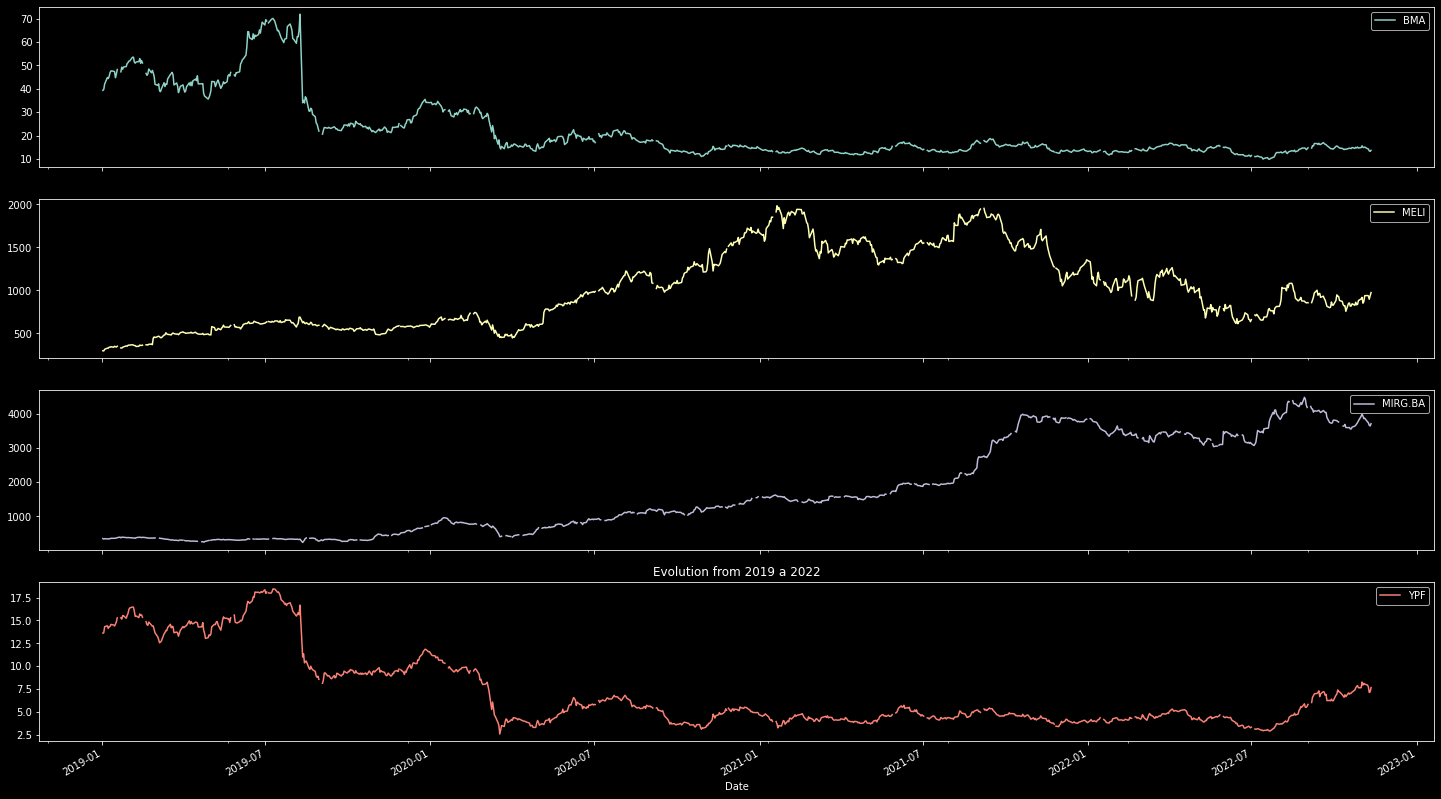

In [39]:
# Acotamos el intervalo temporal, filtrando en nuestro set de datos el período y graficandolo.

closing_df['2019':'2022'].plot(subplots=True, figsize=(25,15))
plt.title('Evolution from 2019 a 2022')
plt.show()

En Mirgor e YPF vemos mejores retornos de la acción en los últimos períodos

In [40]:
# Para tener una idea de los precios y desviaciones del set de datos

closing_df.describe()

BMA         MELI      MIRG.BA          YPF
count  1259.000000  1259.000000  1216.000000  1259.000000
mean     32.440545   851.552854  1457.991108     9.640842
std      25.376590   478.699369  1302.703955     6.210262
min       9.833817   257.519989   235.274246     2.570000
25%      14.232802   394.940002   377.769867     4.380000
50%      18.865280   690.099976   812.683075     6.600000
75%      42.076574  1209.554993  2236.760376    14.774238
max     105.205414  1984.339966  4482.000000    25.904911

**Calculando los retornos**

Un retorno financiero es simplemente el dinero ganado o perdido en una inversión. Un retorno puede ser expresado nominalmente como el cambio en el importe de una inversión a lo largo del tiempo. Se puede calcular como el porcentaje derivado de la relación entre beneficio e inversión.

La fórmula usada en pct_change es:
Rendimiento = {(Precio al t) - (Precio al t-1)} / {Precio en t-1}



Con los precios de cierre, buscamos el rendimiento diario de las acciones propuestas



In [41]:
# Calculamos los retornos de las acciones luego de crear un nuevo set de datos

argy_rets = closing_df.pct_change()
argy_rets

BMA      MELI   MIRG.BA       YPF
Date                                              
2017-11-13       NaN       NaN       NaN       NaN
2017-11-14 -0.143547 -0.017186 -0.034726 -0.034110
2017-11-15  0.036984  0.004000  0.019735 -0.004917
2017-11-16  0.060858 -0.004022  0.021570  0.033243
2017-11-17 -0.037437  0.027621 -0.014800 -0.000870
...              ...       ...       ...       ...
2022-11-07 -0.047714  0.002355 -0.026863 -0.013682
2022-11-08 -0.006959 -0.003933 -0.007299 -0.022699
2022-11-09 -0.058865 -0.042110 -0.020321 -0.081290
2022-11-10 -0.013403  0.042234 -0.005186  0.009831
2022-11-11  0.032453  0.042072  0.017833  0.064673

[1289 rows x 4 columns]

In [42]:
# En base al nuevo set de datos creado, sobre la variable mes/año, graficamos el retorno

argy_rets['Date']=argy_rets.index
argy_rets['Month_Year'] = argy_rets['Date'].dt.strftime('%Y%m')
argy_rets.head()

BMA      MELI   MIRG.BA       YPF       Date Month_Year
Date                                                                    
2017-11-13       NaN       NaN       NaN       NaN 2017-11-13     201711
2017-11-14 -0.143547 -0.017186 -0.034726 -0.034110 2017-11-14     201711
2017-11-15  0.036984  0.004000  0.019735 -0.004917 2017-11-15     201711
2017-11-16  0.060858 -0.004022  0.021570  0.033243 2017-11-16     201711
2017-11-17 -0.037437  0.027621 -0.014800 -0.000870 2017-11-17     201711

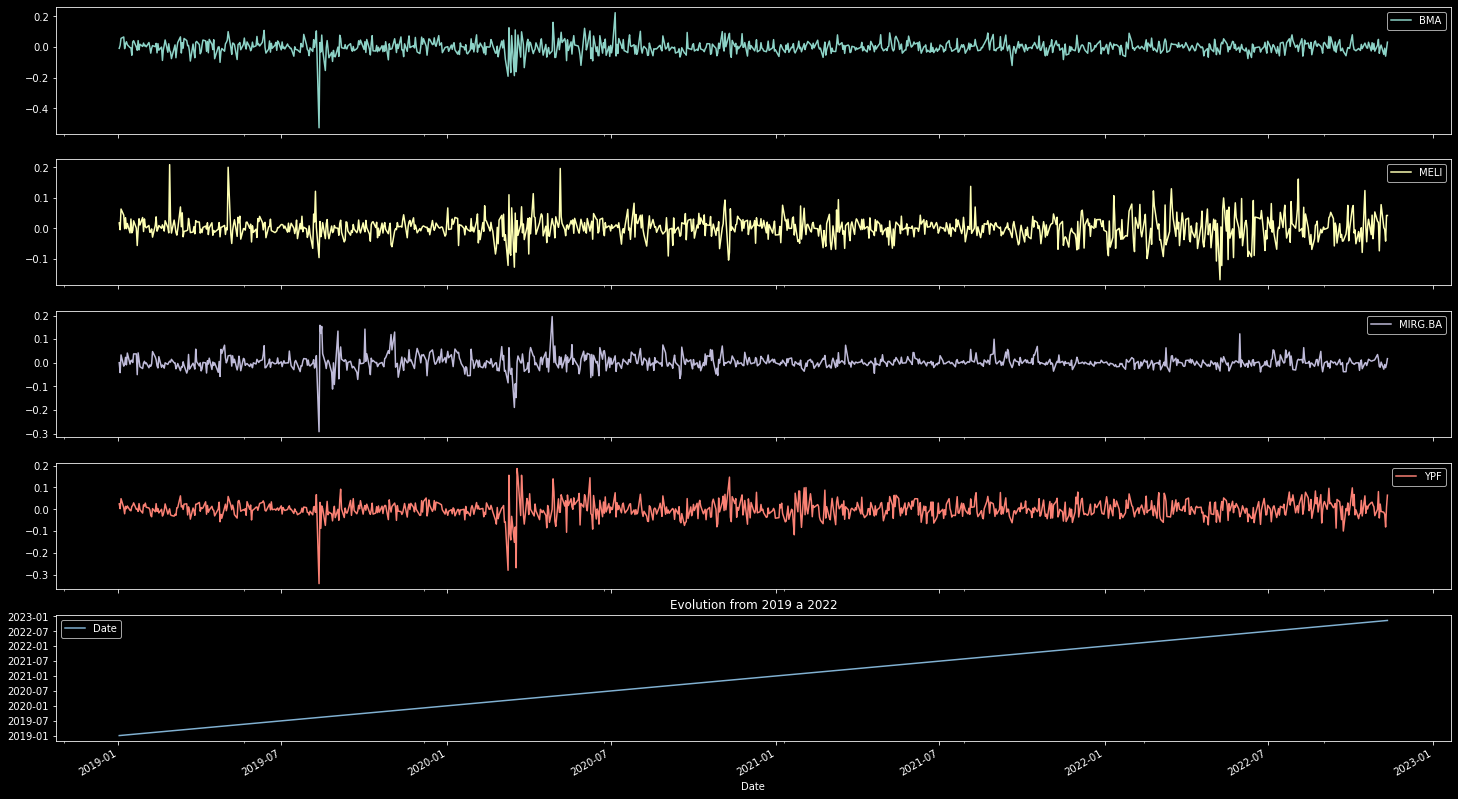

In [43]:
# Graficamos el retorno de las acciones

argy_rets['2019':'2022'].plot(subplots=True, figsize=(25,15))
plt.title('Evolution from 2019 a 2022')
plt.show()

In [45]:
argy_rets.info() # Month_Year es una variable de tipo objeto (String) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1289 entries, 2017-11-13 to 2022-11-11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   BMA         1288 non-null   float64       
 1   MELI        1288 non-null   float64       
 2   MIRG.BA     1288 non-null   float64       
 3   YPF         1288 non-null   float64       
 4   Date        1289 non-null   datetime64[ns]
 5   Month_Year  1289 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 102.8+ KB


In [51]:
# Calculamos la media del retorno del período acotado (2021-01-01)

argy_rets_agrup = argy_rets[argy_rets['Date'] > '2021-01-01'].pivot_table(
    index=[
        "Month_Year"
    ],
    values=['MELI','MIRG.BA','BMA', 'YPF'],
    aggfunc=np.mean
).reset_index()
argy_rets_agrup.sort_values("Month_Year", ascending=False).head(10)

Month_Year       BMA      MELI   MIRG.BA       YPF
22     202211 -0.008475  0.009666 -0.006237  0.001349
21     202210  0.002484  0.005148  0.001503  0.010525
20     202209  0.001243 -0.000916 -0.004918  0.006510
19     202208  0.004394  0.003265  0.003037  0.017903
18     202207  0.007623  0.012502  0.011490  0.006701
17     202206 -0.014120 -0.008323 -0.004499 -0.014781
16     202205  0.004168 -0.007093  0.002786  0.003220
15     202204 -0.007913 -0.009249 -0.000196 -0.006016
14     202203  0.008173  0.003749  0.000630  0.006798
13     202202  0.000249  0.001310 -0.003222 -0.001117

In [52]:
argy_rets_agrup=argy_rets_agrup.set_index('Month_Year')
argy_rets_agrup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 202101 to 202211
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BMA      23 non-null     float64
 1   MELI     23 non-null     float64
 2   MIRG.BA  23 non-null     float64
 3   YPF      23 non-null     float64
dtypes: float64(4)
memory usage: 920.0+ bytes


**FORMAS DE COMPARAR VISUALMENTE DATOS**

In [53]:
# Creamos una función "Highlight_Color", para plotear de color rojo si es negativo o de color verde si es positivo.

def HIGHLIGHT_COLOR(row):
  return [
  'background-color: red;color:white'
  if cell <0
    else  'background-color: green;color:white'
  for cell in row
  ]
argy_rets_agrup.style.apply(HIGHLIGHT_COLOR)

Viendo los últimos períodos de meses, el rendimiento de YPF viene siendo positivo.

In [55]:
# Comparamos cuando YPF rindió mejor que MIRGOR

def comparativa(row):    

    highlight = 'background-color: green;'
    default = ''

    # must return one string per cell in this row
    if row['YPF'] > row['MIRG.BA']:
        return [highlight, default]
    else:
        return [default, default]

argy_rets_agrup.style.apply(comparativa, subset=['YPF', 'MIRG.BA'], axis=1)

In [56]:
# Estilo que pinta de mas tenue a mas oscuro dependiendo el valor de la variable

argy_rets_agrup.style.background_gradient()

In [57]:
# Similar a gradient, aplicamos el gradient sobre una acción puntual y definimos el mínimo y máximo de la acción
# Podemos analizar la aversión al riesgo, para buscar valores negativos en caso de tener mucha aversión al riesgo

argy_rets_agrup.style.background_gradient(subset=["YPF"], cmap="RdYlGn", vmin=-0.01, vmax=0.001)

In [58]:
# Las barras dentro de cada valor, indican el valor de la acción en cada momento de la serie de tiempo

argy_rets_agrup.style.format(precision=3).bar(color="orange")

In [59]:
# Similar al gráfico anterior, pero me indica con rojo los valores negativos y con verde los positivos, respecto al retorno diario.

argy_rets_agrup.style.format(precision=3).bar(align="mid", color=["red", "lightgreen"]).set_properties(**{"border": "1px solid black"})

In [60]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: darkgrey; font-weight:normal;"
}

headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #800000; color: white; text-align: center"
}
properties = {"border": "1px solid black", "width": "65px", "text-align": "center"}

argy_rets_agrup.style.format(precision=3).bar(align="mid", color=["red", "lightgreen"]).set_properties(**properties).set_table_styles([cell_hover, index_names, headers])


Comparativa de distribución de las variables en análisis 

In [61]:
argy_rets.head()

BMA      MELI   MIRG.BA       YPF       Date Month_Year
Date                                                                    
2017-11-13       NaN       NaN       NaN       NaN 2017-11-13     201711
2017-11-14 -0.143547 -0.017186 -0.034726 -0.034110 2017-11-14     201711
2017-11-15  0.036984  0.004000  0.019735 -0.004917 2017-11-15     201711
2017-11-16  0.060858 -0.004022  0.021570  0.033243 2017-11-16     201711
2017-11-17 -0.037437  0.027621 -0.014800 -0.000870 2017-11-17     201711

In [62]:
Column_List = ['MELI','MIRG.BA','BMA', 'YPF']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

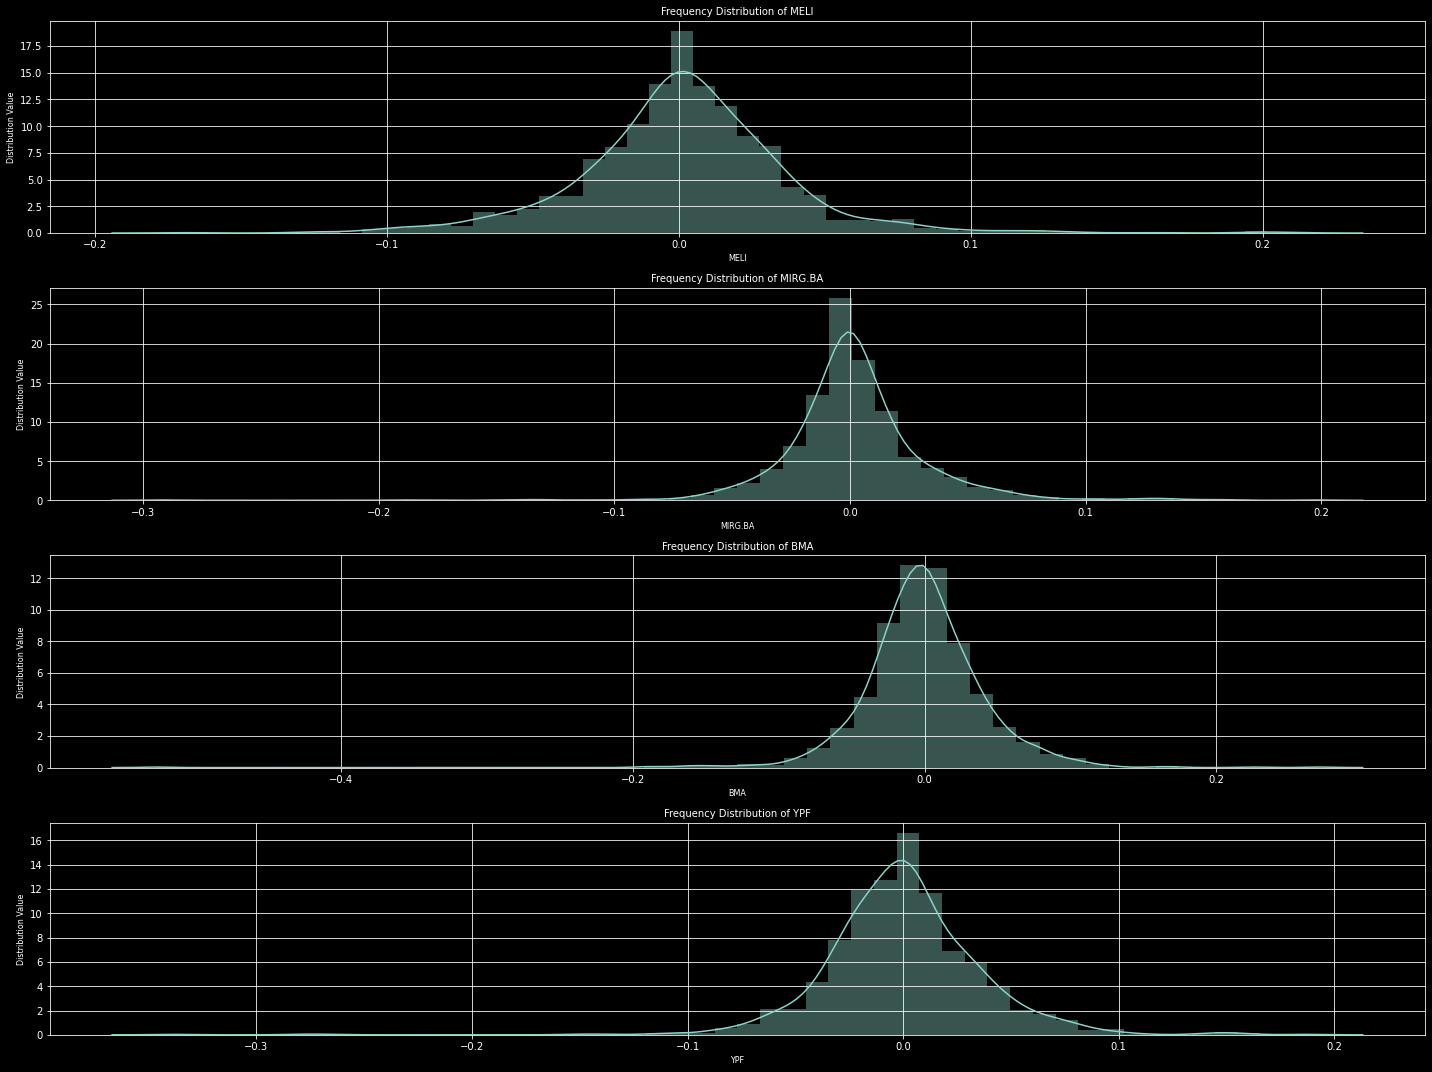

In [64]:
# skweness y kurtosis  son dos indicadores interesantes dentro de una distribución 

# Grafica para la lista de valores
fig, ax = plt.subplots(len(Column_List), figsize = (20, 15)) # Hacer la cantidad de subplots en función de la longitud (cant) de columnas/acciones

# Para cada objeto dentro del vector, hacer un seaborn 
for i, col_list in enumerate(Column_List):
    sns.distplot(argy_rets[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # Espacio entre los gráficos
    ax[i].grid('on') # Habilita las marcas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

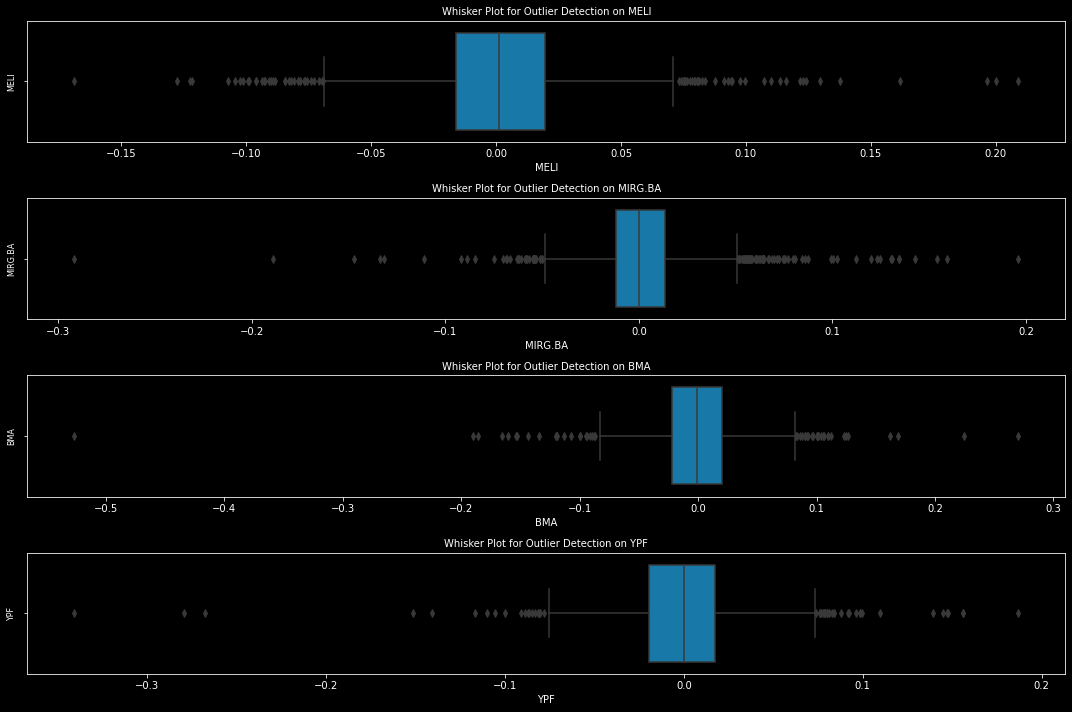

In [65]:
# Gráfico de boxplot (gráficos de cajas)
# Grafican el valor medio de la acción y como ese valor se comporta en función de valores extremos respecto de la media (outliers)
# Outliers = señales de comprar/vender

# whisker plots como elemento para detectar outliers
fig, ax = plt.subplots (len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.boxplot(argy_rets[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

Siempre hay valores atípicos. El ancho de la cajita esta representado por los cuantiles (25%/75%). Mientras más ancha es una curva más aplanada (menor concentración sobre la media). 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

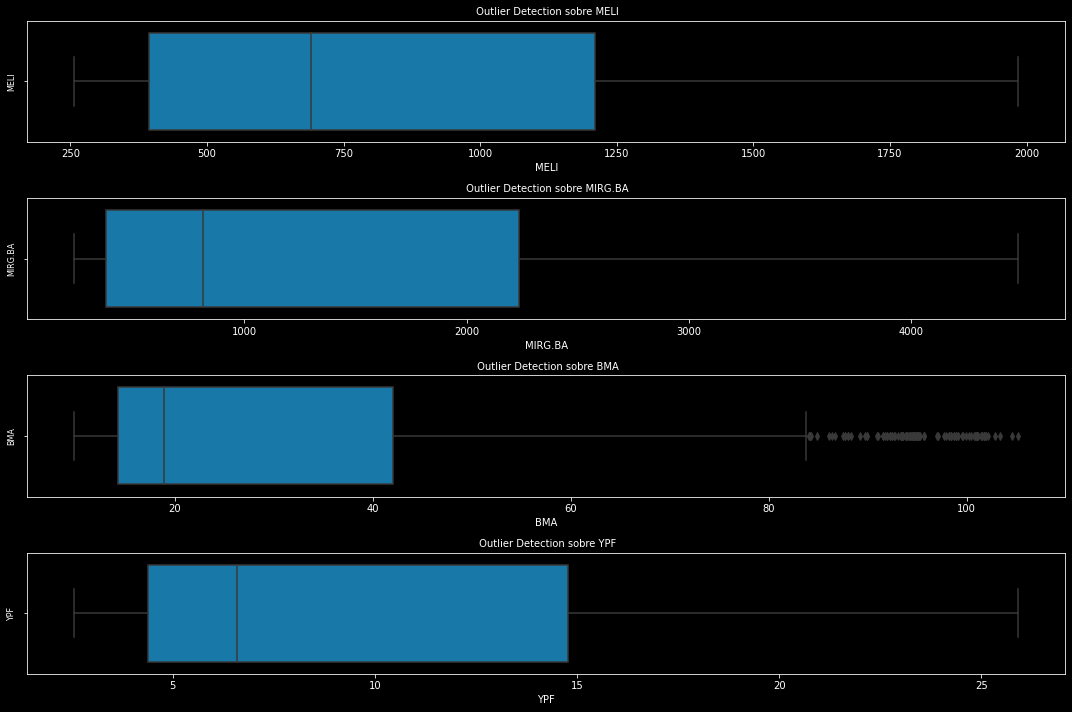

In [66]:
# Usamos el mismo gráfico para evaluar el precio en vez del valor de retorno

# whisker plots como elemento para detectar outliers
fig, ax = plt.subplots (len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.boxplot(closing_df[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title(" Outlier Detection sobre" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

En BANCO MACRO vemos un comportamiento inusual en sus precios.

In [67]:
closing_df['Date1']=closing_df.index
closing_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BMA        MELI     MIRG.BA        YPF      Date1
Date                                                               
2017-11-13  99.158638  266.954407  492.724335  22.838131 2017-11-13
2017-11-14  84.924759  262.366577  475.614105  22.059113 2017-11-14
2017-11-15  88.065605  263.416077  485.000244  21.950640 2017-11-15
2017-11-16  93.425064  262.356598  495.461884  22.680355 2017-11-16
2017-11-17  89.927490  269.603180  488.128967  22.660631 2017-11-17

In [68]:
# Utilizamos la librería de ploty.express para poder hacer un gráfico más dinámico para interactuar

import plotly.express as px
colors = px.colors.qualitative.Plotly
fig = go.Figure()
#fig.add_traces(go.Scatter(x=closing_df['Date1'], y = closing_df['MIRG.BA'], mode = 'lines', line=dict(color=colors[4])))
#fig.add_traces(go.Scatter(x=closing_df['Date1'], y = closing_df['BMA'], mode = 'lines', line=dict(color=colors[3])))
#fig.add_traces(go.Scatter(x=closing_df['Date1'], y = closing_df['MELI'], mode = 'lines', line=dict(color=colors[2])))
fig.add_traces(go.Scatter(x=closing_df['Date1'], y = closing_df['YPF'], mode = 'lines', line=dict(color=colors[1])))

fig.show()

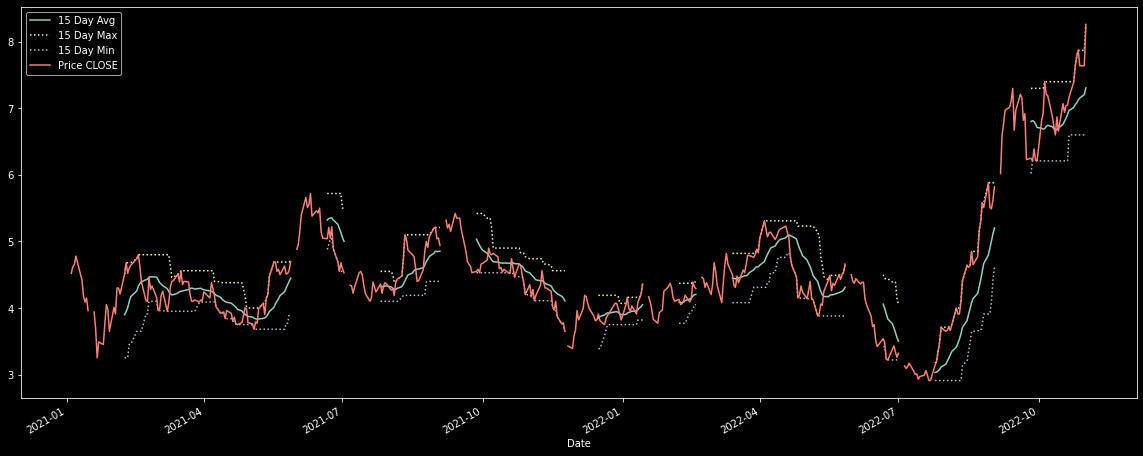

In [69]:
# Graficamos el precio de cierre de la variable YPF, y la media móvil de 15 días, el mínimo y el máximo

plt.figure(figsize=(20,8))
closing_df['YPF'].loc['2021-01-01' : '2022-11-01'].rolling(window = 15).mean().plot(label = "15 Day Avg")
closing_df['YPF'].loc['2021-01-01' : '2022-11-01'].rolling(window = 15).max().plot(label = "15 Day Max", linestyle = 'dotted')
closing_df['YPF'].loc['2021-01-01' : '2022-11-01'].rolling(window = 15).min().plot(label = "15 Day Min",linestyle = 'dotted' )
closing_df['YPF'].loc['2021-01-01' : '2022-11-01'].plot(label = "Price CLOSE")
plt.legend()
plt.show()

Comparativa del rendimiento porcentual diario de dos acciones para comprobar su correlación. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



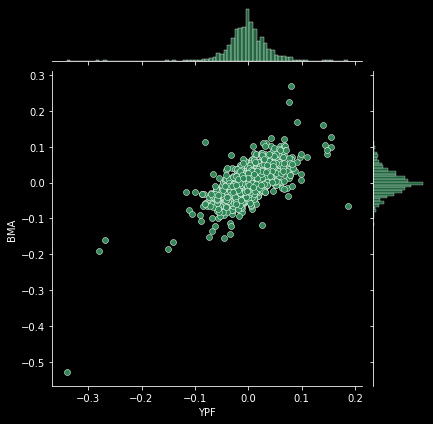

In [70]:
# Correlación = en función de la aversión al riesgo, podemos buscar cubrirnos con una acción que tenga un comportamiento contraria

sns.jointplot('YPF','BMA',argy_rets,kind='scatter',color='seagreen')


Coeficiente de correlación producto-momento de Pearson (correlación en los retornos % diarios).

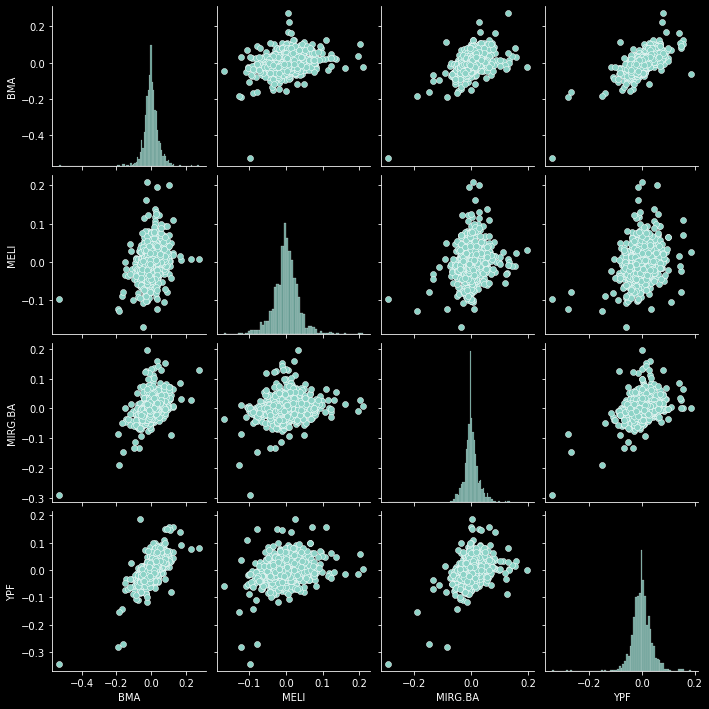

In [71]:
sns.pairplot(argy_rets.dropna())


También podemos usar sns.PairGrid () para un control total de la figura, incluido el tipo de gráficos que van en la diagonal, el triángulo superior y el triángulo inferior. 

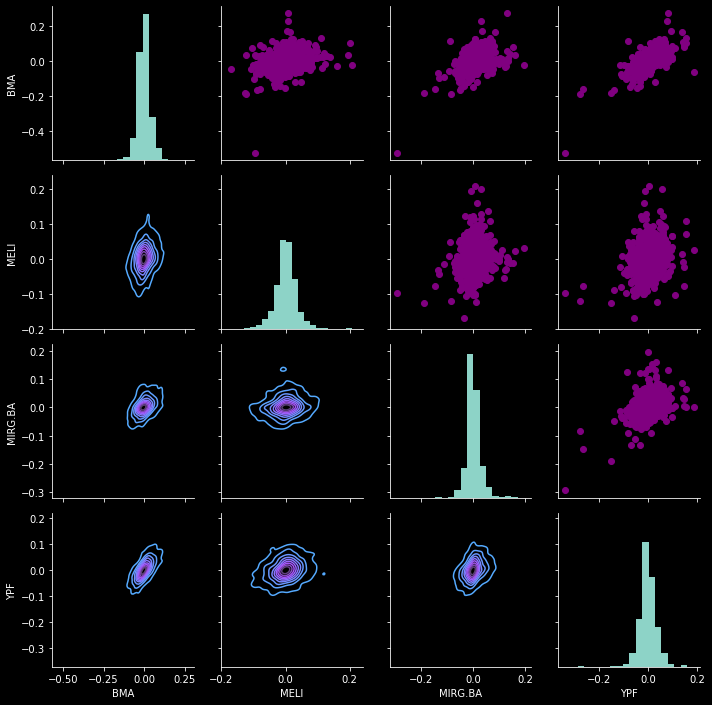

In [72]:
# tomamos el set de datos de argy_rest sacando lo snulos y usamos y usamos una visualización de librería Seaborn
returns_fig = sns.PairGrid(argy_rets.dropna())

# Usando map_upper que parte de la matriz, triangulo superior o inferior, queremos de qué forma. En este caso en la parte superior queremos el gráfico de scatter plot
returns_fig.map_upper(plt.scatter,color='purple')

# y en la parte inferior queremsos un gráfico estilo color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finalmente en la diagonal ponemos los histogramas
returns_fig.map_diag(plt.hist,bins=20)

Adicionamos un gráfico de correlación para obtener los valores númericos reales para la correlación entre los valores de retornos diarios de las acciones. 


In [73]:
argy_rets.corr()

BMA      MELI   MIRG.BA       YPF
BMA      1.000000  0.273017  0.482075  0.691879
MELI     0.273017  1.000000  0.174598  0.276398
MIRG.BA  0.482075  0.174598  1.000000  0.394158
YPF      0.691879  0.276398  0.394158  1.000000

Mapas de calor

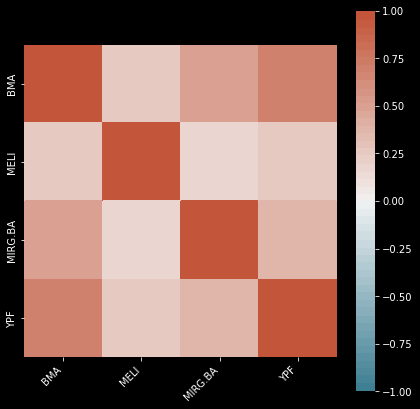

In [74]:
corr = argy_rets.corr()
fig, ax = plt.subplots(figsize=(7,7))        
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
   cmap=sns.diverging_palette (220, 20, n=50),
     #cmap=sns.color_palette("crest", as_cmap=True),

    square=True


)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'

);

In [75]:
stock1 =  ['MELI','MIRG.BA','BMA', 'YPF', 'CRES.BA','BBAR','EDN.BA','RICH.BA', 'PAMP.BA']
stock_prices1 = yf.download(tickers=stock1,period='1y', interval='1d')
closing_df1 = stock_prices1['Adj Close']
tech_rets1 = closing_df1.pct_change()
tech_rets1.head()

[*********************100%***********************]  9 of 9 completed


BBAR       BMA   CRES.BA    EDN.BA      MELI   MIRG.BA  \
Date                                                                     
2021-11-11       NaN       NaN       NaN       NaN       NaN       NaN   
2021-11-12       NaN       NaN  0.009087  0.011994       NaN  0.000253   
2021-11-15 -0.032581 -0.005827 -0.029716 -0.053333  0.022578  0.006079   
2021-11-16 -0.067358 -0.081477 -0.000464 -0.071988 -0.056123  0.000755   
2021-11-17 -0.052778 -0.026803 -0.010214  0.032884 -0.035172 -0.010818   

             PAMP.BA  RICH.BA       YPF  
Date                                     
2021-11-11       NaN      NaN       NaN  
2021-11-12 -0.014161      NaN       NaN  
2021-11-15 -0.041259      NaN -0.011628  
2021-11-16 -0.028371      NaN -0.054118  
2021-11-17  0.007546      NaN -0.012438

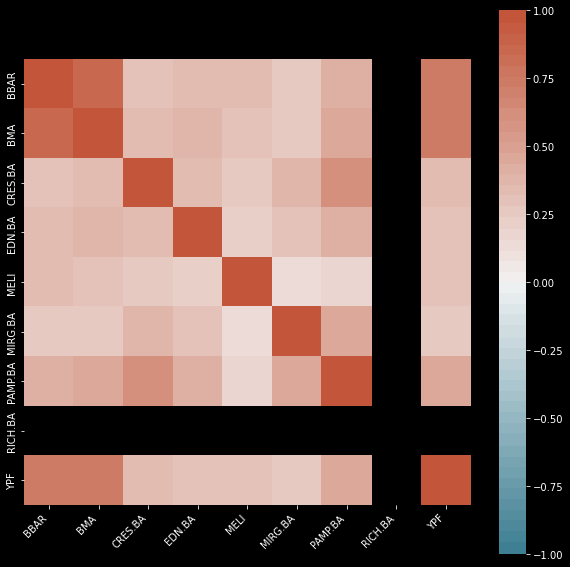

In [76]:
corr = tech_rets1.corr()
fig, ax = plt.subplots(figsize=(10,10))        
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
   cmap=sns.diverging_palette (220, 20, n=50),
     #cmap=sns.color_palette("crest", as_cmap=True),

    square=True


)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'

);

# Risk Analysis


A través de la información recopilada sobre los rendimientos porcentuales diarios, comparamos el rendimiento esperado con la desviación estándar de los rendimientos diarios.



In [77]:
#argy_rets.drop(['Month_Year'], axis = 'columns', inplace=True)
argy_rets.tail(10)

BMA      MELI   MIRG.BA       YPF       Date Month_Year
Date                                                                    
2022-10-31  0.012270  0.022535  0.035173  0.000000 2022-10-31     202210
2022-11-01  0.050505  0.019654  0.016798  0.081152 2022-11-01     202211
2022-11-02 -0.040385 -0.074031 -0.015394 -0.039952 2022-11-02     202211
2022-11-03 -0.005344  0.023024 -0.018813  0.023960 2022-11-03     202211
2022-11-04  0.013432  0.077726  0.003109 -0.009852 2022-11-04     202211
2022-11-07 -0.047714  0.002355 -0.026863 -0.013682 2022-11-07     202211
2022-11-08 -0.006959 -0.003933 -0.007299 -0.022699 2022-11-08     202211
2022-11-09 -0.058865 -0.042110 -0.020321 -0.081290 2022-11-09     202211
2022-11-10 -0.013403  0.042234 -0.005186  0.009831 2022-11-10     202211
2022-11-11  0.032453  0.042072  0.017833  0.064673 2022-11-11     202211

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



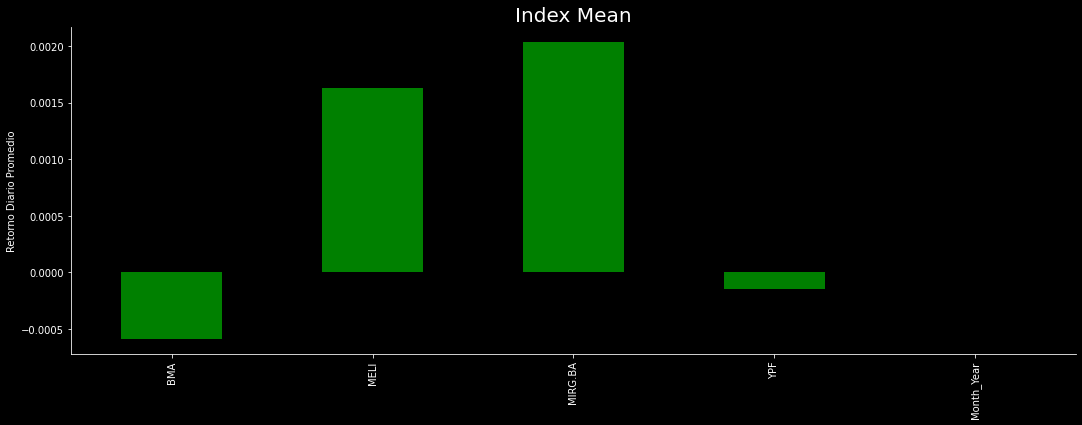

In [78]:
# Calculamos y usamos Media del la variación de precios como un indicador de Rentablidad
argy_rets.mean().plot(kind='bar', color='Green')
plt.ylabel('Retorno Diario Promedio')
plt.title('Index Mean', fontsize=20)
sns.despine()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



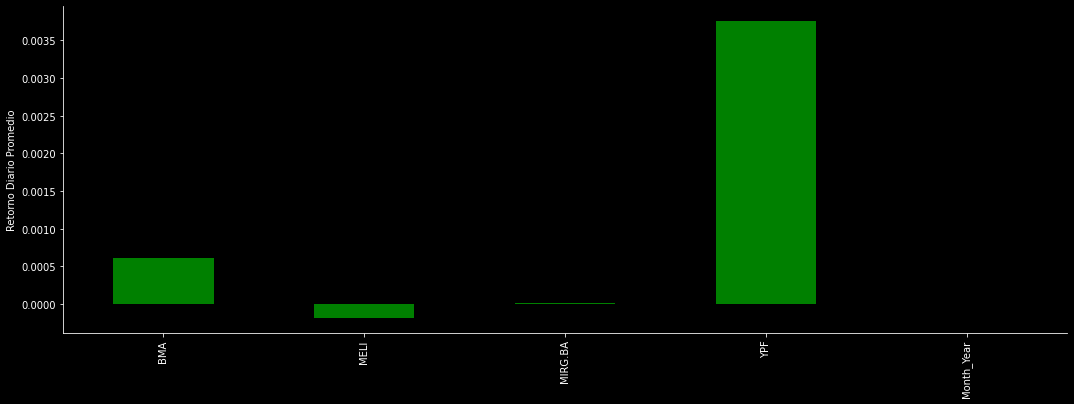

In [79]:
# Podríamos repetirlo sobre un período puntual 
# Calculamos y usamos Media del la variación del precios como un indicador de Rentablidad
argy_rets.loc['2022-01-01':'2022-11-30'].mean().plot(kind='bar', color='Green')
plt.ylabel('Retorno Diario Promedio')
plt.ylabel('Retorno Diario Promedio')
sns.despine()


**Valor en Riesgo**

Cantidad de dinero que podríamos esperar perder (también conocido como poner en riesgo) durante un intervalo de confianza determinado. Hay varios métodos que podemos utilizar para estimar un valor en riesgo. Sigamos adelante y veamos algunos de ellos en acción.

In [80]:
YPF.tail(10)

Open  High   Low  Close  Adj Close   Volume    Return  MA_10  \
Date                                                                       
2022-10-31  7.49  7.70  7.36   7.64       7.64  1963100  0.000000  7.415   
2022-11-01  7.78  8.34  7.76   8.26       8.26  2715900  0.081152  7.547   
2022-11-02  8.25  8.31  7.93   7.93       7.93  2026800 -0.039952  7.636   
2022-11-03  7.92  8.24  7.82   8.12       8.12  2405200  0.023960  7.743   
2022-11-04  8.39  8.59  8.02   8.04       8.04  2107700 -0.009852  7.830   
2022-11-07  8.05  8.27  7.92   7.93       7.93  1627800 -0.013682  7.884   
2022-11-08  7.90  7.90  7.61   7.75       7.75  1936900 -0.022699  7.896   
2022-11-09  7.73  7.75  7.04   7.12       7.12  2799700 -0.081290  7.830   
2022-11-10  7.50  7.61  7.11   7.19       7.19  1800000  0.009831  7.762   
2022-11-11  7.36  7.71  7.31   7.66       7.66  1491872  0.065369  7.764   

             MA_20   MA_50  Daily_Return      Date1  Year  Month  WeekDay  \
Date                                                                        
2022-10-31  7.1845  6.6442      0.000000 2022-10-31  2022     10        0   
2022-11-01  7.2510  6.7140      0.081152 2022-11-01  2022     11        1   
2022-11-02  7.2775  6.7692     -0.039952 2022-11-02  2022     11        2   
2022-11-03  7.3230  6.8256      0.023960 2022-11-03  2022     11        3   
2022-11-04  7.3655  6.8748     -0.009852 2022-11-04  2022     11        4   
2022-11-07  7.4180  6.9232     -0.013682 2022-11-07  2022     11        0   
2022-11-08  7.4690  6.9606     -0.022699 2022-11-08  2022     11        1   
2022-11-09  7.4950  6.9928     -0.081290 2022-11-09  2022     11        2   
2022-11-10  7.5110  7.0268      0.009831 2022-11-10  2022     11        3   
2022-11-11  7.5610  7.0676      0.065369 2022-11-11  2022     11        4   

           Month_Year  
Date                   
2022-10-31     202210  
2022-11-01     202211  
2022-11-02     202211  
2022-11-03     202211  
2022-11-04     202211  
2022-11-07     202211  
2022-11-08     202211  
2022-11-09     202211  
2022-11-10     202211  
2022-11-11     202211

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



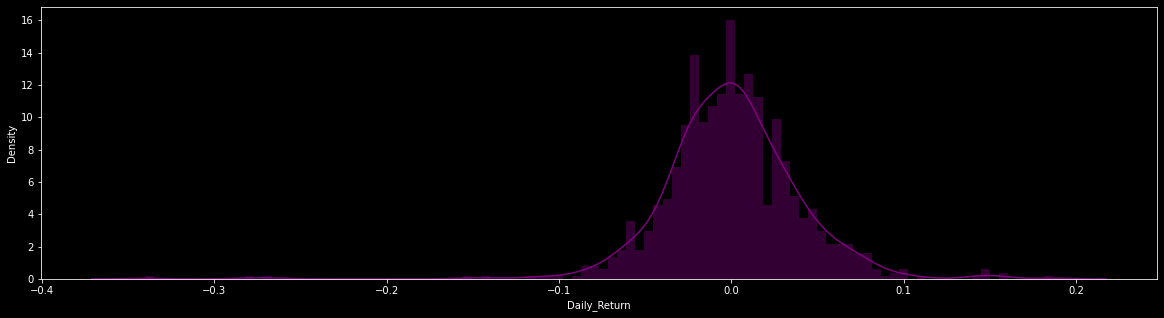

In [81]:
plt.figure(figsize=(20,5))
sns.distplot(YPF['Daily_Return'].dropna(),bins=100,color='purple')


Utilizamos el cuantil para obtener el valor de riesgo de la acción.

In [82]:
YPF['Daily_Return'].quantile(0.05)


-0.0572629051726793

El cuantil  0,05 de los rendimientos diarios está en -0.053. Eso significa que con un 95% de confianza, nuestra peor pérdida diaria no superará el 5.3%. Si tenemos una inversión de 1 millón de dólares, nuestro VaR al 5% a un día es 0.0531 * 1,000,000 = $ 53.077.



In [83]:
import yfinance as yf
from datetime import date
from prophet import Prophet

As training data we need stock prices from the past.

Select a stock you want to predict and a range from a date in the past until today.

Then use yfinance to download the data.

In [84]:
# Get data
START = '2019-01-01'
TODAY = date.today().strftime("%Y-%m-%d")

# 'MELI','MIRG.BA','BMA', 'YPF'
selected_stock = 'YPF'

data = yf.download(selected_stock, START, TODAY)
data.reset_index(inplace=True)

data.head()

[*********************100%***********************]  1 of 1 completed


Date   Open   High    Low  Close  Adj Close   Volume
0 2019-01-02  13.30  13.86  13.12  13.72  13.615568   904300
1 2019-01-03  13.90  14.00  13.63  13.76  13.655263  1238400
2 2019-01-04  14.00  14.68  13.92  14.43  14.320164  1739000
3 2019-01-07  14.53  14.75  14.41  14.53  14.419402  2120500
4 2019-01-08  14.63  14.69  14.16  14.23  14.121685  2135400

To train the algorithm we only need this data:
x = Date
y = Closing stock price from this date

In [85]:
# Predict forecast with Prophet
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)

# Create future period to predict
n_years = 1 # 2, 3, 4
period = n_years * 365
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4jn6rsv/gcqmi7me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj4jn6rsv/s6cp9onp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78235', 'data', 'file=/tmp/tmpj4jn6rsv/gcqmi7me.json', 'init=/tmp/tmpj4jn6rsv/s6cp9onp.json', 'output', 'file=/tmp/tmpj4jn6rsv/prophet_model1og1rznd/prophet_model-20221111215610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:56:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:56:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1334 2023-11-06  8.442906    5.783668   11.385360
1335 2023-11-07  8.429115    5.671914   11.193975
1336 2023-11-08  8.411294    5.587970   11.353452
1337 2023-11-09  8.407464    5.565659   11.201562
1338 2023-11-10  8.439218    5.543645   11.280068

Now we have the forecast!

We can plot it with m.plot()

You can change n_years above and play around with different periods to predict.

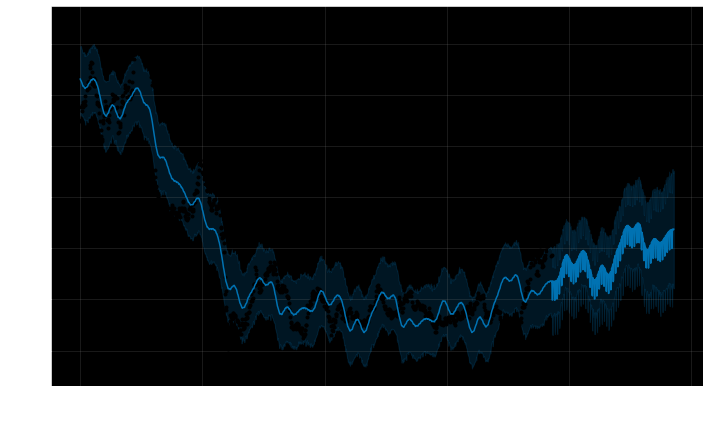

In [87]:
# plot forecast
fig1 = m.plot(forecast)

 We can also plot the trend, and the weekly and yearly forecast:


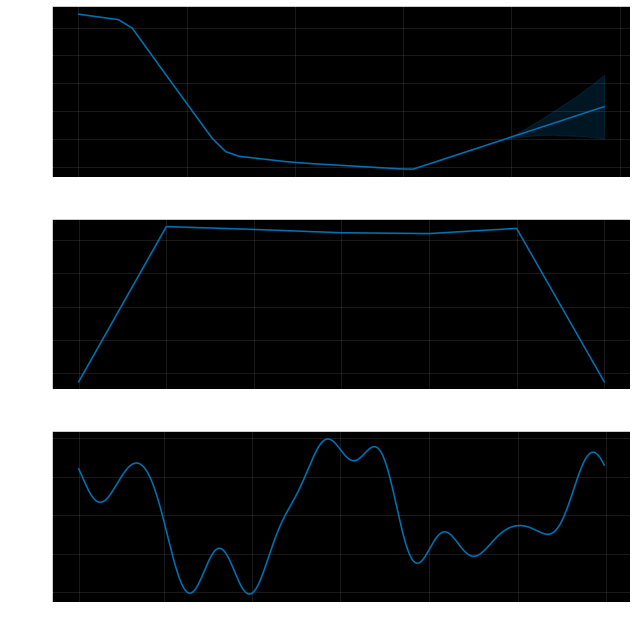

In [88]:
# plot trend, weekly, and yearly forecast
fig2 = m.plot_components(forecast)

In [89]:
ticker = "YPF"
data = yf.download(ticker, period='20y')
print('\n--Describe--\n', data.describe())
print('\n--Head--\n', data.head(4))
print('\n--Columns--\n', data.columns)

[*********************100%***********************]  1 of 1 completed

--Describe--
               Open         High          Low        Close    Adj Close  \
count  5036.000000  5036.000000  5036.000000  5036.000000  5036.000000   
mean     27.645947    28.027679    27.232569    27.620657    20.817443   
std      15.647516    15.777229    15.494878    15.634798    10.161256   
min       2.780000     2.940000     2.250000     2.570000     2.570000   
25%      14.900000    15.170000    14.610000    14.890000    13.273670   
50%      25.950001    26.299999    25.600000    25.945001    21.204098   
75%      40.799999    41.362499    40.299999    40.784999    29.240144   
max      69.449997    69.980003    68.699997    69.199997    46.989059   

             Volume  
count  5.036000e+03  
mean   8.501049e+05  
std    1.311659e+06  
min    0.000000e+00  
25%    6.300000e+03  
50%    4.859000e+05  
75%    1.267850e+06  
max    2.681430e+07  

--Head--
              Open   High    Low  Close  

In [90]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [16, 5]

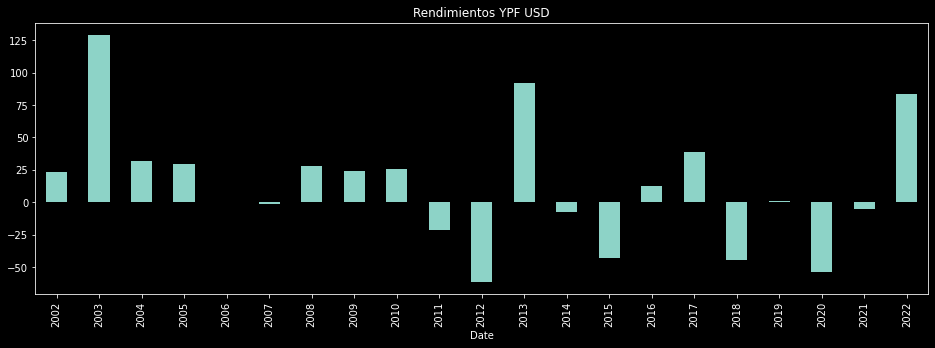

In [91]:
variaciones =  data['Adj Close'].pct_change()*100
agrupados = variaciones.groupby(data.index.year).sum()
agrupados.plot(kind='bar',title='Rendimientos YPF USD')
plt.show()

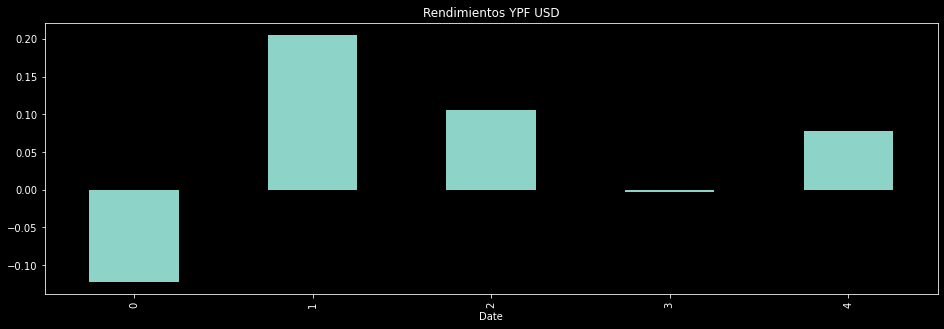

In [92]:
plt.style.use('dark_background')
variaciones =  data['Adj Close'].pct_change()*100
agrupados = variaciones.groupby(data.index.dayofweek).mean()
agrupados.plot(kind='bar',title='Rendimientos YPF USD')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



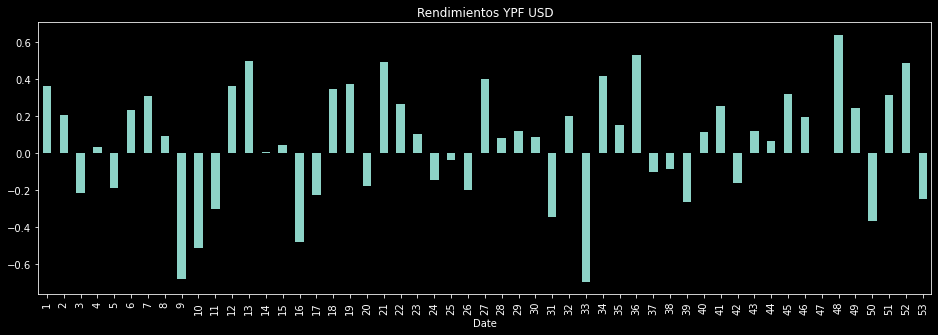

In [93]:
#RESAMPLE
data['Adj Close'].resample('W').last() 
variaciones =  data['Adj Close'].pct_change()*100
agrupados = variaciones.groupby(data.index.week).mean()
agrupados.plot(kind='bar',title='Rendimientos YPF USD')
plt.show()

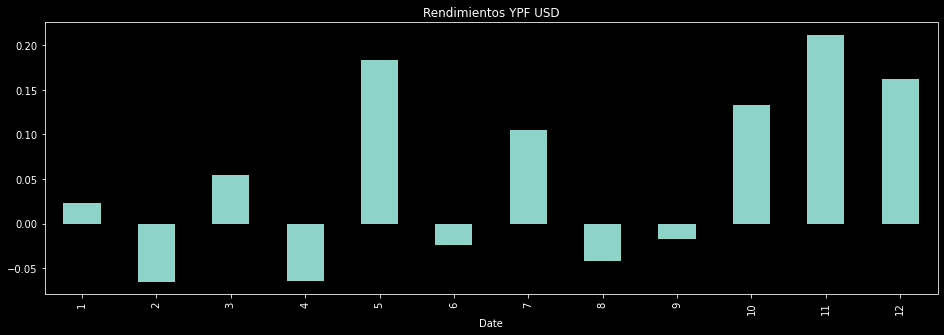

In [94]:
data['Adj Close'].resample('M').last() 
variaciones =  data['Adj Close'].pct_change()*100
agrupados = variaciones.groupby(data.index.month).mean()
agrupados.plot(kind='bar',title='Rendimientos YPF USD')

In [95]:
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 286 kB/s 


Quick Start with Quantstats

In [96]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('YPF')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.23969531694941515

Visualize stock performance

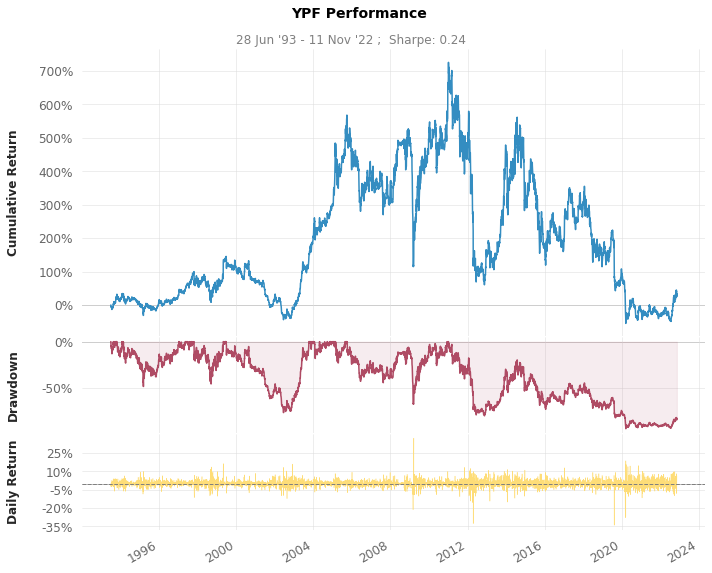

In [97]:
qs.plots.snapshot(stock, title='YPF Performance')

# can also be called via:
# stock.plot_snapshot(title='YPF Performance')

In [98]:
!pip install pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 3.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 9.5 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88680 sha256=d74d138da48d1324b68264be61e9c95aef1475e30862d8119ae4c805886bd953
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39779 sha256=e0cd30a1feda9677fc7cbab530989b453309439e60d0dbd98feb304e54d0358e
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [99]:
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-ioe650wg
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-ioe650wg
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=7666c5e0585fd05ca28ce7e485740a341767f46fe7ef8777a6911c8143b0b3b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnyvq3a_/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
Successfully built pyfolio
  Attempting uninstall: pyfolio
    Found existing installation: pyfolio 0.9.2
    Uninstalling pyfolio-0.9.2:
      Successfully uninstalled pyfolio-0.9.2


In [100]:
import pyfolio as pf
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning:

Module "zipline.assets" not found; multipliers will not be applied to position notionals.



Armamos la serie de los rendimientos diarios, 10yr a hoy, de la cartera con esos tickers y vemos que el rendimiento diario es de 0,012%  con un desvío estandar del 2.28%

In [101]:
cartera = ['MELI','MIRG.BA','BMA', 'YPF']
data = pd.DataFrame(columns=cartera)

for ticker in cartera:
 data[ticker] = yf.download(ticker, period='10y')['Adj Close']

data = data.pct_change().dropna().mean(axis=1)
print(data.describe())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
count    2518.000000
mean        0.001296
std         0.022811
min        -0.313748
25%        -0.010213
50%         0.001051
75%         0.013273
max         0.121802
dtype: float64


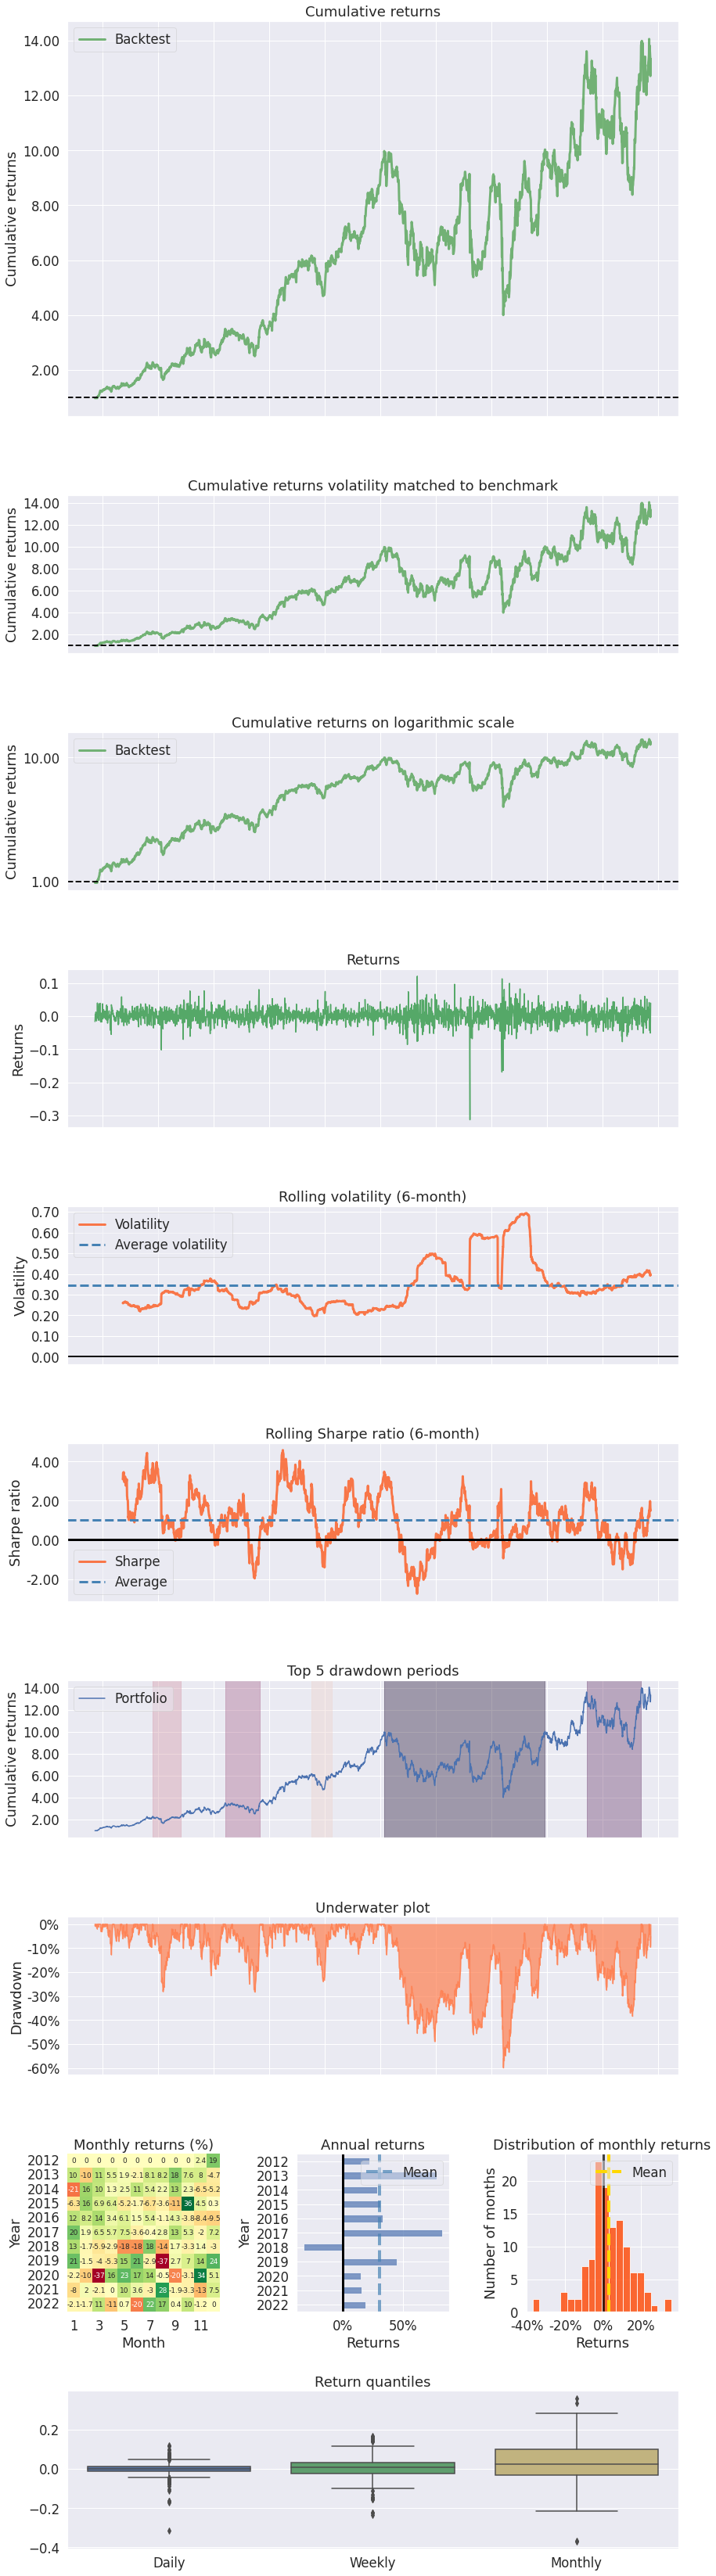

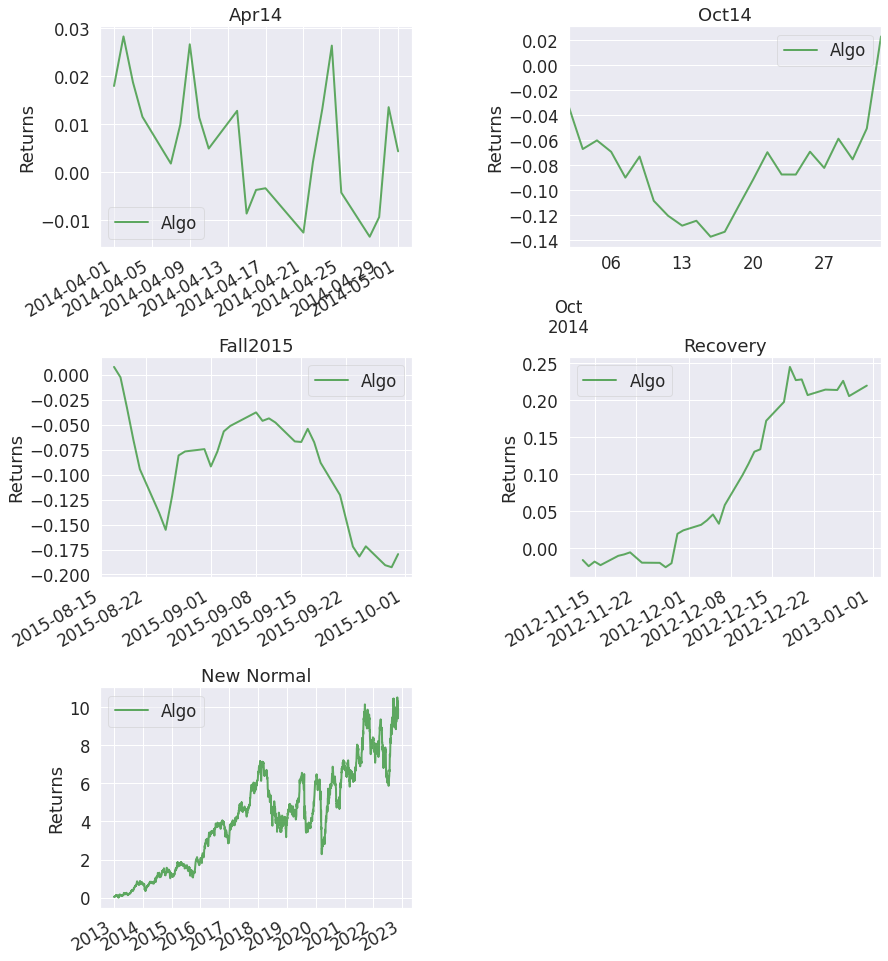

In [102]:
pf.create_full_tear_sheet(data)

In [103]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.1 MB/s 


In [104]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
import yfinance as yf
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#list of stocks in portfolio
stock_list = ['YPF', 'MIRG.BA','BMA','MELI']
print('stock_list:', stock_list)
data = yf.download(stock_list,  period='10y')
print('data fields downloaded:', set(data.columns.get_level_values(0)))
data.head()
stocks_df = data['Adj Close']

stock_list: ['YPF', 'MIRG.BA', 'BMA', 'MELI']
[*********************100%***********************]  4 of 4 completed
data fields downloaded: {'Volume', 'Adj Close', 'Open', 'Close', 'High', 'Low'}


In [106]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()

BMA      MELI   MIRG.BA       YPF
Date                                              
2012-11-13 -0.012640 -0.015321 -0.006410 -0.029637
2012-11-14 -0.017781 -0.017183  0.008065 -0.006897
2012-11-15  0.015931  0.024917 -0.009600 -0.005848
2012-11-16 -0.017819  0.013163  0.014539 -0.029412
2012-11-19  0.013062 -0.006231 -0.015923  0.060606

In [107]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.tail()

BMA      MELI   MIRG.BA       YPF
Date                                              
2022-11-07 -0.047714  0.002355 -0.026863 -0.013682
2022-11-08 -0.006959 -0.003933 -0.007299 -0.022699
2022-11-09 -0.058865 -0.042110 -0.020321 -0.081290
2022-11-10 -0.013403  0.042234 -0.005186  0.009831
2022-11-11  0.031698  0.042072  0.023045  0.063978

In [108]:
stocks_df

BMA        MELI      MIRG.BA       YPF
Date                                                    
2012-11-12  11.717990   73.340012    20.224287  9.832326
2012-11-13  11.569871   72.216385    20.094646  9.540928
2012-11-14  11.364148   70.975479    20.256704  9.475128
2012-11-15  11.545185   72.743988    20.062237  9.419719
2012-11-16  11.339459   73.701523    20.353931  9.142668
...               ...         ...          ...       ...
2022-11-07  14.370000  940.780029  3767.500000  7.930000
2022-11-08  14.270000  937.080017  3740.000000  7.750000
2022-11-09  13.430000  897.619995  3664.000000  7.120000
2022-11-10  13.250000  935.530029  3645.000000  7.190000
2022-11-11  13.670000  974.890015  3729.000000  7.650000

[2580 rows x 4 columns]

In [109]:
fig_price = px.line(stocks_df, title='Price of Individual Stocks')
fig_price.show()

In [110]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()

BMA      MELI   MIRG.BA       YPF
Date                                              
2012-11-13 -0.012640 -0.015321 -0.006410 -0.029637
2012-11-14 -0.017781 -0.017183  0.008065 -0.006897
2012-11-15  0.015931  0.024917 -0.009600 -0.005848
2012-11-16 -0.017819  0.013163  0.014539 -0.029412
2012-11-19  0.013062 -0.006231 -0.015923  0.060606

In [111]:
fig = px.line(daily_returns[['YPF', 'MIRG.BA','BMA','MELI']], title='Daily Returns')
fig.show()

The distribution of stock returns follows an approximate normal distribution.

(-0.1, 0.1)

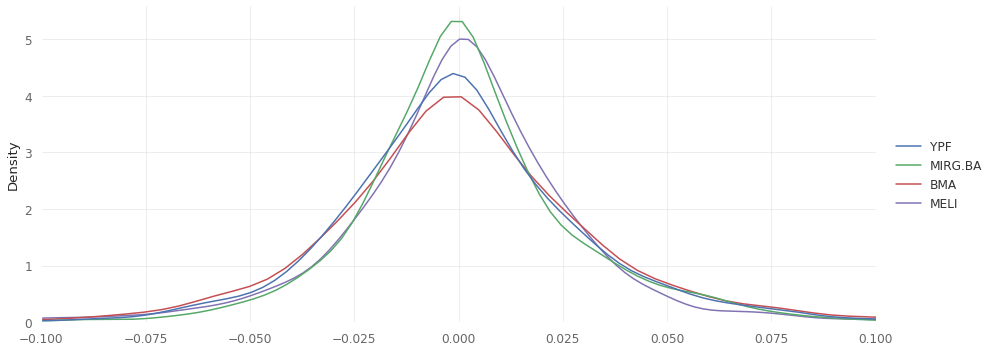

In [112]:
sns.displot(data=daily_returns[['YPF', 'MIRG.BA','BMA','MELI']], kind = 'kde', aspect = 2.5)
plt.xlim(-0.1, 0.1)

In [113]:
def plot_cum_returns(data, title):    
    daily_cum_returns = 1 + data.dropna().pct_change()
    daily_cum_returns = daily_cum_returns.cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig
    
    
fig_cum_returns = plot_cum_returns(stocks_df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig_cum_returns.show()

The correlation of stocks is quite significant so diversification can be difficult.

In [114]:
corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

Mean-variance optimization

In [115]:
# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(stocks_df)
mu = expected_returns.capm_return(stocks_df, market_prices=None, returns_data=False, risk_free_rate=0.04, compounding=True, frequency=252, log_returns=False)
S = risk_models.CovarianceShrinkage(stocks_df).ledoit_wolf()

mu

BMA        0.362607
MELI       0.224512
MIRG.BA    0.244053
YPF        0.320111
Name: mkt, dtype: float64

NotImplementedError: ignored

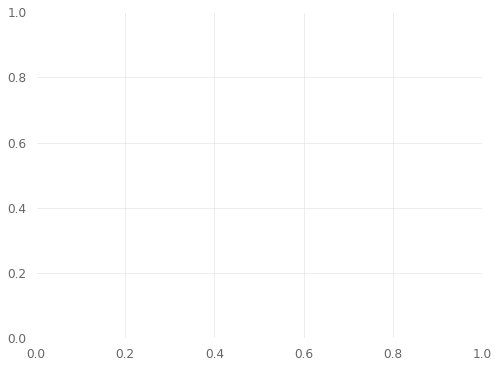

In [116]:
def plot_efficient_frontier_and_max_sharpe(mu, S):  
    # Optimize portfolio for maximal Sharpe ratio 
    ef = EfficientFrontier (mu, S)

    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0.04)
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

  
    

    # Generate random portfolios
    n_samples = 10000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()
    
plot_efficient_frontier_and_max_sharpe(mu, S)

In [117]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 3.4 MB/s 


In [118]:
import mplfinance as mpf

Historic stock price 📈


In [119]:
ticker = "YPF"
history = yf.Ticker(ticker).history(period="3mo")
print(f"3 months low: {history.Low.min().astype(int)}")
print(f"3 months high: {history.High.max().astype(int)}")


3 months low: 4
3 months high: 8


In [120]:
history.tail()

Open  High   Low  Close   Volume  Dividends  \
Date                                                                     
2022-11-07 00:00:00-05:00  8.05  8.27  7.92   7.93  1627800          0   
2022-11-08 00:00:00-05:00  7.90  7.90  7.61   7.75  1936900          0   
2022-11-09 00:00:00-05:00  7.73  7.75  7.04   7.12  2799700          0   
2022-11-10 00:00:00-05:00  7.50  7.61  7.11   7.19  1800000          0   
2022-11-11 00:00:00-05:00  7.36  7.71  7.35   7.65  1803021          0   

                           Stock Splits  
Date                                     
2022-11-07 00:00:00-05:00             0  
2022-11-08 00:00:00-05:00             0  
2022-11-09 00:00:00-05:00             0  
2022-11-10 00:00:00-05:00             0  
2022-11-11 00:00:00-05:00             0

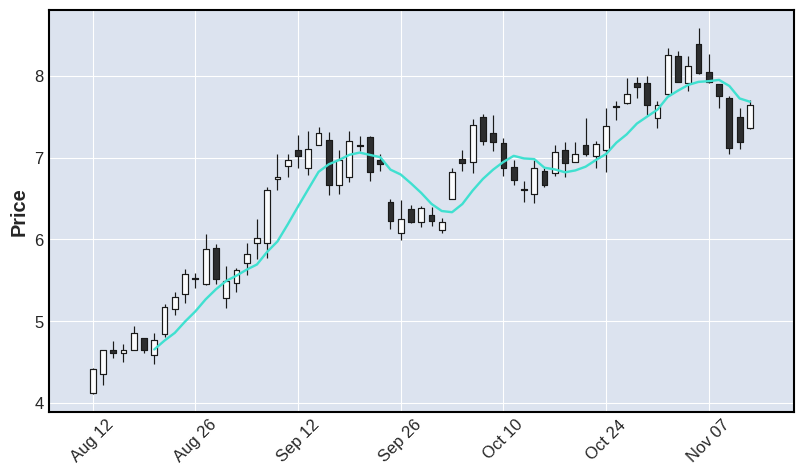

In [121]:
mpf.plot(history, type='candle', mav=(7),figratio=(18,10))
